In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from typing import List, Dict, Union
from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from openai import OpenAI
from metrics import *
from agent import ConditionalMemoryAgent
from prompt import *

# Filter data for Qualitative Analysis

### T14

In [ ]:
# 1st training dataset for T14
# print the memory at the 40th report
t_train_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset0.csv")
memory_dict_t = {}
for idx, row in t_train_df.iterrows():
    memory_dict_t[f"{idx+1}"] = row['cmem_t_memory_str']
print(memory_dict_t['40'])

# 1st test dataset for T14 (KEPA, zscot)
t_test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_0_outof_10runs.csv").sort_values(by="patient_filename")
t_zscot_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_zs_test_800.csv").sort_values(by="patient_filename")

split_ids = t_test_df.patient_filename
t_zscot_df = t_zscot_df[t_zscot_df.patient_filename.isin(split_ids)]

In [ ]:
for memory_patient, zs_patient in zip(t_test_df.patient_filename, t_zscot_df.patient_filename):
    assert memory_patient == zs_patient

output_dir = "/home/yl3427/cylab/selfCorrectionAgent/result/studio_label/t14"
os.makedirs(output_dir, exist_ok=True)

ids_set = set()
for idx, (filename, label, memory_ans, zs_ans, memory_rsn, zs_rsn) in enumerate(zip(t_test_df.patient_filename, t_test_df.t, t_test_df.cmem_t_40reports_ans_str, t_zscot_df.zs_t_ans_str, t_test_df.cmem_t_40reasoning, t_zscot_df.zs_t_reasoning)):
    # if (f"T{label+1}" in zs_ans.upper()) and (f"T{label+1}" in memory_ans.upper()): # cases where both are correct
    # if (f"T{label+1}" not in zs_ans.upper()) and (f"T{label+1}" in memory_ans.upper()): # cases where only memory was correct
    # if (f"T{label+1}" in zs_ans.upper()) and (f"T{label+1}" not in memory_ans.upper()): # cases where only zs was correct
    if (f"T{label+1}" not in zs_ans.upper()) and (f"T{label+1}" not in memory_ans.upper()): # cases where both were wrong
        ids_set.add(filename)
        # data = {
        #     "data": {
        #         "humanMachineDialogue": [
        #             {"author": "Patient filename", "text": filename},
        #             {"author": "Memory Reasoning", "text": memory_rsn},
        #             {"author": "ZS Reasoning", "text": zs_rsn}, 
        #             {"author": "Answer", "text": f"T{label+1}"},
        #             {"author": "Memory Answer", "text": memory_ans},
        #             {"author": "ZS Answer", "text": zs_ans}
        #         ]
        #     }
        # }
        
        # file_name = f"t_data_{idx}.json"
        # file_path = os.path.join(output_dir, file_name)
        # with open(file_path, 'w') as json_file:
        #     json.dump(data, json_file, indent=4)

In [ ]:
len(ids_set)

### N03

In [ ]:
# 1st training dataset for N03
# print the memory at the 40th report
n_train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_memory_dataset0.csv")
memory_dict_n = {}
for idx, row in n_train_df.iterrows():
    # if row["cmem_t_is_updated"] == True:
    memory_dict_n[f"{idx+1}"] = row['cmem_n_memory_str']
print(memory_dict_n['40'])

# 1st test dataset for N03 (KEPA, zscot)
n_test_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_0_outof_10runs.csv").sort_values(by="patient_filename")
n_zscot_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_zs_test_800.csv").sort_values(by="patient_filename")

split_ids = n_test_df.patient_filename
n_zscot_df = n_zscot_df[n_zscot_df.patient_filename.isin(split_ids)]

In [ ]:
for memory_patient, zs_patient in zip(n_test_df.patient_filename, n_zscot_df.patient_filename):
    assert memory_patient == zs_patient

output_dir = "/home/yl3427/cylab/selfCorrectionAgent/result/studio_label/n03"
os.makedirs(output_dir, exist_ok=True)

ids_set = set()
for idx, (filename, label, memory_ans, zs_ans, memory_rsn, zs_rsn) in enumerate(zip(n_test_df.patient_filename, n_test_df.n, n_test_df[f"cmem_n_40reports_ans_str"], n_zscot_df.zs_n_ans_str, n_test_df[f"cmem_n_40reasoning"], n_zscot_df.zs_n_reasoning)):
    memory_ans = memory_ans.replace("NO", "N0").replace("NX", "N0")
    zs_ans = zs_ans.replace("NO", "N0").replace("NX", "N0")
    # if (f"N{label}" in zs_ans.upper()) and (f"N{label}" in memory_ans.upper()): # cases where both are correct
    if (f"N{label}" not in zs_ans.upper()) and (f"N{label}" in memory_ans.upper()): # cases where only memory was correct
        ids_set.add(filename)
    # if (f"N{label}" in zs_ans.upper()) and (f"N{label}" not in memory_ans.upper()): # cases where only zs was correct
    # if (f"N{label}" not in zs_ans.upper()) and (f"N{label}" not in memory_ans.upper()): # cases where both were wrong
        # data = {
        #     "data": {
        #         "humanMachineDialogue": [
        #             {"author": "Patient filename", "text": filename},
        #             {"author": "Memory Reasoning", "text": memory_rsn},
        #             {"author": "ZS Reasoning", "text": zs_rsn}, 
        #             {"author": "Answer", "text": f"N{label}"},
        #             {"author": "Memory Answer", "text": memory_ans},
        #             {"author": "ZS Answer", "text": zs_ans}
        #         ]
        #     }
        # }
        
        # file_name = f"n_data_{idx}.json"
        # file_path = os.path.join(output_dir, file_name)
        # with open(file_path, 'w') as json_file:
        #     json.dump(data, json_file, indent=4)

In [ ]:
len(ids_set)

# Retrieve report, given a value of a column

In [ ]:
filename = "TCGA-E9-A5FK.D346F4E5-4E4A-4161-96FB-7B8ABBB17128"
mem_reasoning = ""
txt ="""FINAL DIAGNOSIS: PART 1: LYMPH NODE, LEFT AXILLARY SENTINEL NODE #1, BIOPSY -. TWO SENTINEL LYMPH NODES, NEGATIVE FOR CARCINOMA (0/2). PART 2: LYMPH NODE, LEFT AXILLARY SENTINEL NODE #2, BIOPSY -. TWO SENTINEL LYMPH NODES, NEGATIVE FOR CARCINOMA (0/2). PART 3: BREASI, LEET, 12 O'CLOCK SEGMENTAL MASTECTOMY -. A. INFILTRATING MAMMARY CARCINOMA, WITH MIXED DUCTAL AND LOBULAR PHENOTYPES, NOTTINGHAM. GRADE 2/3 (TUBULE FORMATION: 3, NUCLEAR PLEOMORPHISM. 3, MITOTIC ACTIVITY: 1, TOTAL SCORE: 7/9). B. THE INVASIVE CARCINOMA MEASURES 1.9 CM IN GREATEST DIMENSION (GROSS MEASUREMENT). C. DUCTAL CARCINOMA IN SITU (DCIS), NUCLEAR GRADE 2, SOLID TYPE. D. DCIS CONSTITUTES LESS THAN 5% OF THE TOTAL TUMOR MASS, AND IS PRESENT ADMIXED WITH THE. INVASIVE CARCINOMA. E. SURGICAL MARGINS ARE NEGATIVE FOR INFILTRATING CARCINOMA AND DCIS. INFILTRATING CARCINOMA. IS 0.3 CM FROM THE CLOSEST POSTERIOR MARGIN (3I). F. NO LYMPHOVASCULAR INVASION IDENTIFIED. G. FOCAL DUCTAL EPITHELIAL HYPERPLASIA. H. PREVIOUS BIOPSY SITE CHANGES. I. FIBROCYSTIC CHANGES WITH APOCRINE HYPERPLASIA AND SCLEROSING ADENOSIS. J. IMMUNOSTAIN FOR ESTROGEN RECEPTOR IS POSITIVE. NEGATIVE. CASE SYNOPSIS: SYNOPTIC - PRIMARY INVASIVE CARCINOMA OF BREAST. LATERALITY: Left. PROCEDURE: Segmental. Upper outer quadrant. SIZE OF TUMOR: Maximum dimension invasive component: 1.9 cm. MULTICENTRICITY/MULTIFOCALITY OF INVASIVE FOCI: TUMOR TYPE (invasive component): Ductal adenocarcinoma, NOS, Infiltrating lobular carcinoma. HISTOLOGIC TYPE: Classical. NOTTINGHAM SCORE: Nuclear grade: 3. Tubule formation: 3. Mitotic activity score: 1. Total Nottingham score: 7. Nottingham grade (1, 2, 3): 2. ANGIOLYMPHATIC INVASION: DERMAL LYMPHATIC INVASION: Not applicable. CALCIFICATION: TUMOR TYPE, IN SITU: Solid, DCIS admixed with invasive carcinoma. SURGICAL MARGINS INVOLVED BY INVASIVE COMPONENT: SURG MARGINS INVOLVED BY IN SITU COMPONENT: LYMPH NODES POSITIVE: 0. LYMPH NODES EXAMINED: 4. METHOD(S) OF LYMPH NODE EXAMINATION: H/E stain. SENTINEL NODE METASTASIS: NON-NEOPLASTIC BREAST TISSUE: FCD. T STAGE, PATHOLOGIC: pT1c. N STAGE, PATHOLOGIC: pNO. M STAGE, PATHOLOGIC: pMX. ESTROGEN RECEPTORS: positive. PROGESTERONE RECEPTORS: negative. zero or 1+. COMMENT: invasive HER2/NEU: carcinoma show features of lobular carcinoma in H&E sections. ductal carcinoma The immunohistochemical (membranous stains stains for for E-. E-. The tumors cells show the patten of E-cadherin and strong. diffuse cytoplasmic stain for P120.
""" 
test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_0.csv")
for idx, (file_name, memory_reasoning, report) in enumerate(zip(test_df['patient_filename'], test_df['cmem_n_reasoning'], test_df['text'])):
    if file_name == filename:
    # if txt.strip() == report.strip():
        # print(file_name)
        # print(zs_predict_prompt_n03.format(report=report))
        print(report)
        # print(idx)
        break

# Quantative Analysis

In [ ]:
# zs cot
t_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_zs_test_800.csv")
print(t14_calculate_metrics(t_df['t'], t_df['zs_t_ans_str']))

n_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_zs_test_800.csv")
print(n03_calculate_metrics(n_df['n'], n_df['zs_n_ans_str']))

# zs
t_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_real_zs_test_800.csv")
print(t14_calculate_metrics(t_df['t'], t_df['zs_t_ans_str']))

n_df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_real_zs_test_800.csv")
print(n03_calculate_metrics(n_df['n'], n_df['zs_n_ans_str']))

# ensReas
t_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_ensReas_step1/brca_t14_merged_df_800.csv")
print(t14_calculate_metrics(t_df['t'], t_df['sc_ans']))

n_df = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_ensReas_step1/brca_n03_merged_df.csv")
print(n03_calculate_metrics(n_df['n'], n_df['sc_ans']))

In [ ]:
def calculate_mean_std(results, cat):
    precision_list = [result[cat]['precision'] for result in results]
    recall_list = [result[cat]['recall'] for result in results]
    f1_list = [result[cat]['f1'] for result in results]
    support_list = [result[cat]['support'] for result in results]
    num_errors_list = [result[cat]['num_errors'] for result in results]
    
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_f1 = sum(f1_list) / len(f1_list)
    
    std_precision = (sum([(x - mean_precision)**2 for x in precision_list]) / len(precision_list))**0.5
    std_recall = (sum([(x - mean_recall)**2 for x in recall_list]) / len(recall_list))**0.5
    std_f1 = (sum([(x - mean_f1)**2 for x in f1_list]) / len(f1_list))**0.5
    
    return {
        'mean_precision': round(mean_precision, 3),
        'mean_recall': round(mean_recall, 3),
        'mean_f1': round(mean_f1, 3),
        'std_precision': round(std_precision, 3),
        'std_recall': round(std_recall, 3),
        'std_f1': round(std_f1, 3),
        'sum_support': sum(support_list),
        'sum_num_errors': sum(num_errors_list),
        'raw_mean_precision': mean_precision,
        'raw_mean_recall': mean_recall,
        'raw_mean_f1': mean_f1,
    }

### T14

In [ ]:
# t14
zs_t = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_real_zs_test_800.csv")
zscot_t = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_zs_test_800.csv")
ensReas_t = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_ensReas_step1/brca_t14_merged_df_800.csv")

zs_t_results = []
zscot_t_results = []
ensReas_t_results = []
kepa_t_results = []

for run in range(9):
    split_ids = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{run}.csv").patient_filename
    zs_t_split = zs_t[zs_t.patient_filename.isin(split_ids)]
    zs_t_results.append(t14_calculate_metrics(zs_t_split['t'], zs_t_split['zs_t_ans_str']))

    zscot_t_split = zscot_t[zscot_t.patient_filename.isin(split_ids)]
    zscot_t_results.append(t14_calculate_metrics(zscot_t_split['t'], zscot_t_split['zs_t_ans_str']))

    ensReas_t_split = ensReas_t[ensReas_t.patient_filename.isin(split_ids)]
    ensReas_t_results.append(t14_calculate_metrics(ensReas_t_split['t'], ensReas_t_split['sc_ans']))

    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv")
    kepa_t_results.append(t14_calculate_metrics(test_df['t'], test_df['cmem_t_40reports_ans_str']))

In [ ]:
results = kepa_t_results

categories = ['T1', 'T2', 'T3', 'T4']
metrics = {category: calculate_mean_std(results, category) for category in categories}
metrics

In [ ]:
precisions =[]
recalls = []
f1s = []
for key, value in metrics.items():
    precisions.append(value['raw_mean_precision'])
    recalls.append(value['raw_mean_recall'])
    f1s.append(value['raw_mean_f1'])
    
round(sum(precisions)/len(precisions), 3), round(sum(recalls)/len(recalls), 3), round(sum(f1s)/len(f1s), 3)

### N03

In [ ]:
# n03
zs_n = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_real_zs_test_800.csv")
zscot_n = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_zs_test_800.csv")
ensReas_n = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_ensReas_step1/brca_n03_merged_df.csv")

zs_n_results = []
zscot_n_results = []
ensReas_n_results = []
kepa_n_results = []

for run in range(5):
    split_ids = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{run}.csv").patient_filename
    zs_n_split = zs_n[zs_n.patient_filename.isin(split_ids)]
    zs_n_results.append(n03_calculate_metrics(zs_n_split['n'], zs_n_split['zs_n_ans_str']))

    zscot_n_split = zscot_n[zscot_n.patient_filename.isin(split_ids)]
    zscot_n_results.append(n03_calculate_metrics(zscot_n_split['n'], zscot_n_split['zs_n_ans_str']))

    ensReas_n_split = ensReas_n[ensReas_n.patient_filename.isin(split_ids)]
    ensReas_n_results.append(n03_calculate_metrics(ensReas_n_split['n'], ensReas_n_split['sc_ans']))

    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_{run}_outof_10runs.csv")
    kepa_n_results.append(n03_calculate_metrics(test_df['n'], test_df['cmem_n_40reports_ans_str']))

In [ ]:
results = kepa_n_results
categories = ['N0', 'N1', 'N2', 'N3']
metrics = {category: calculate_mean_std(results, category) for category in categories}
metrics

In [ ]:
precisions =[]
recalls = []
f1s = []
for key, value in metrics.items():
    precisions.append(value['raw_mean_precision'])
    recalls.append(value['raw_mean_recall'])
    f1s.append(value['raw_mean_f1'])

round(sum(precisions)/len(precisions), 3), round(sum(recalls)/len(recalls), 3), round(sum(f1s)/len(f1s), 3)

# Plot scores for 10 splits, given 10 memories

### T14

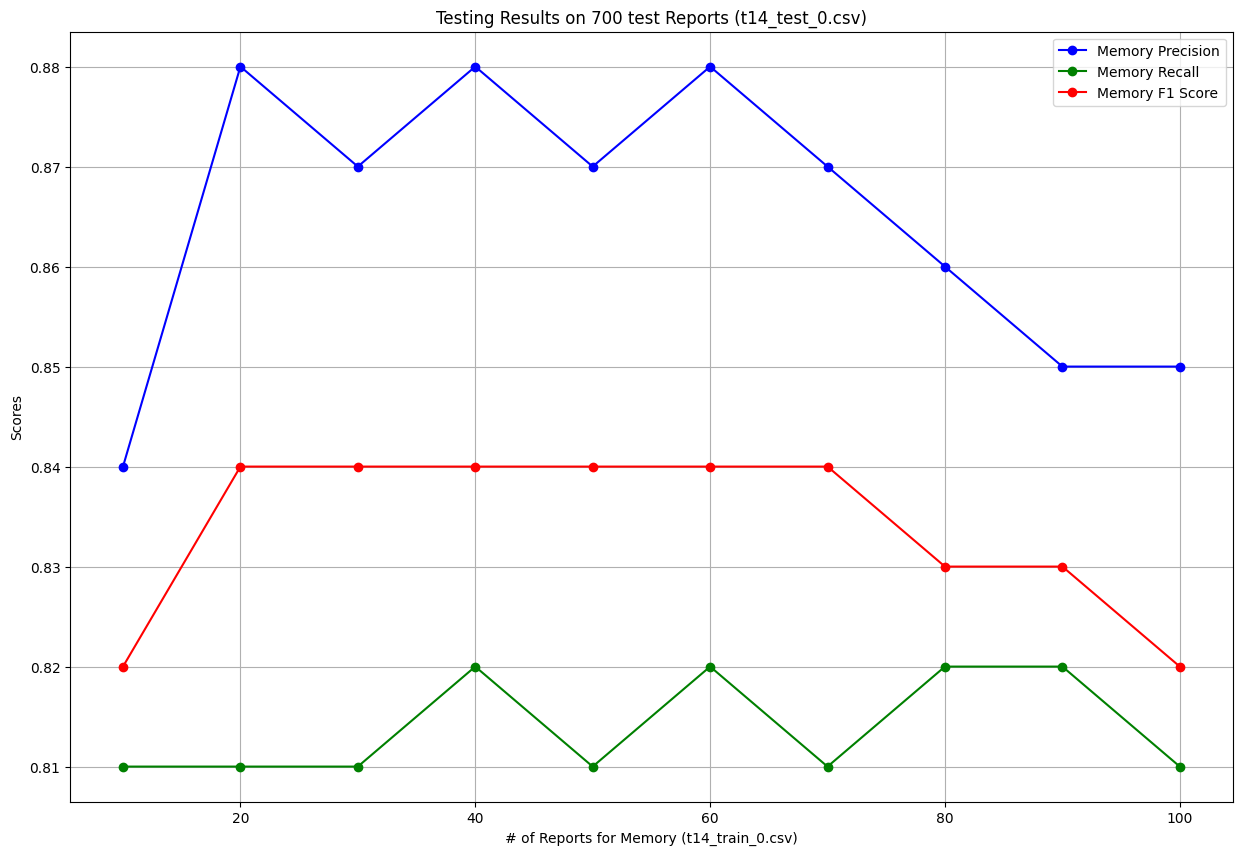

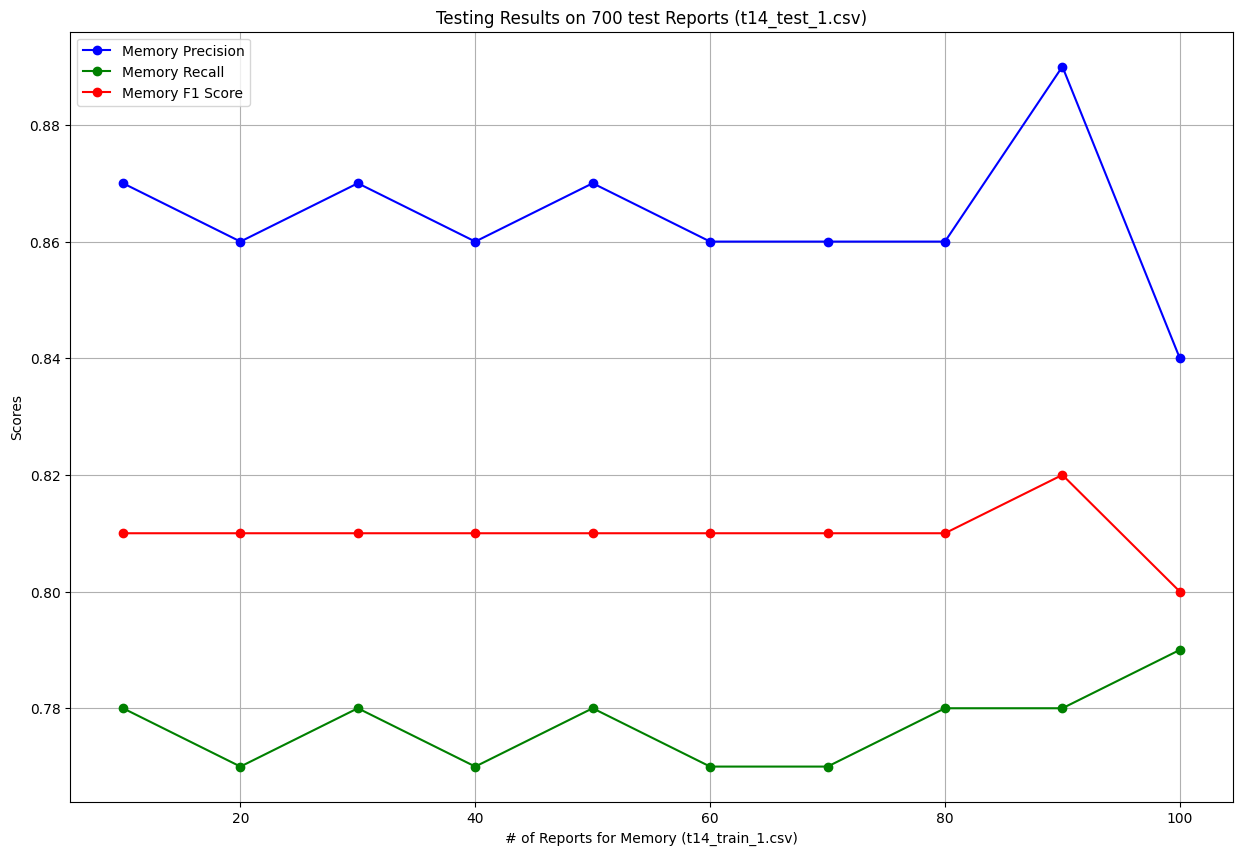

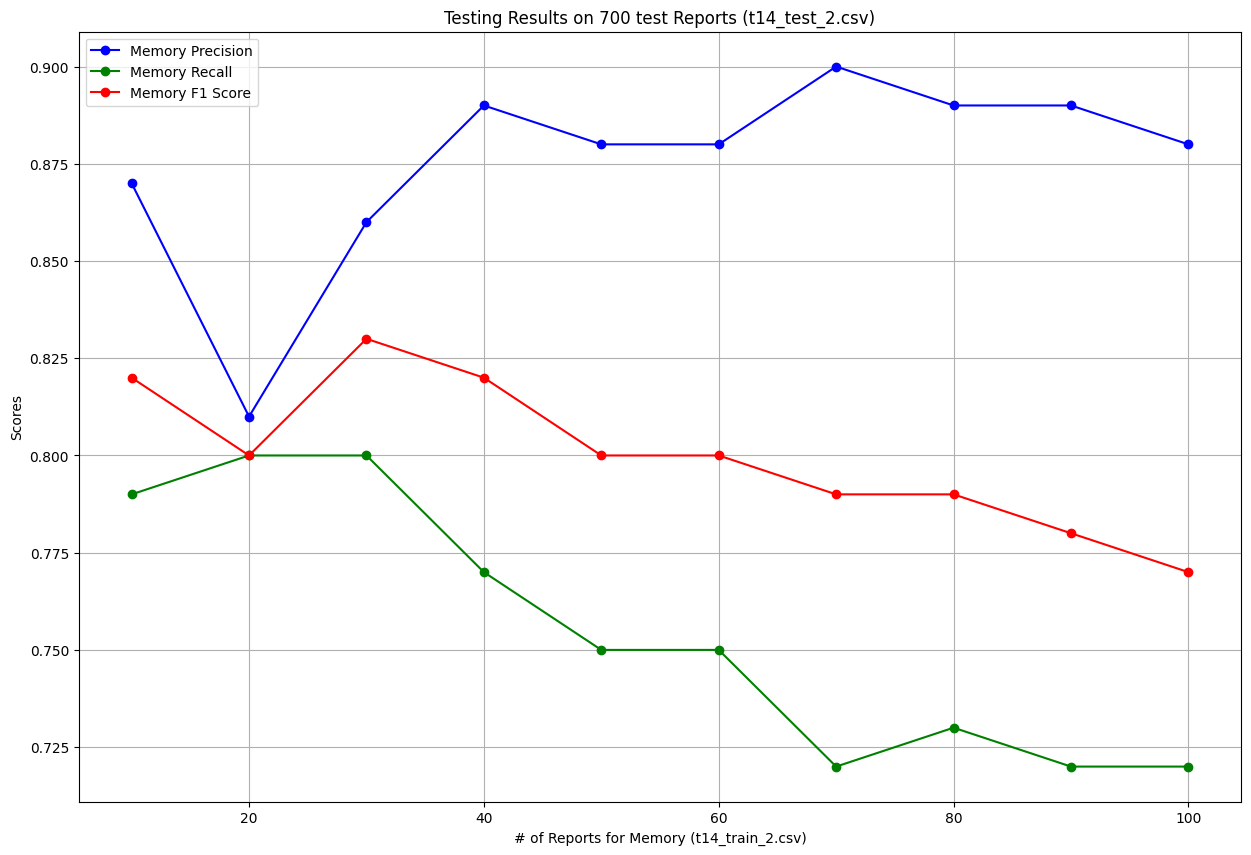

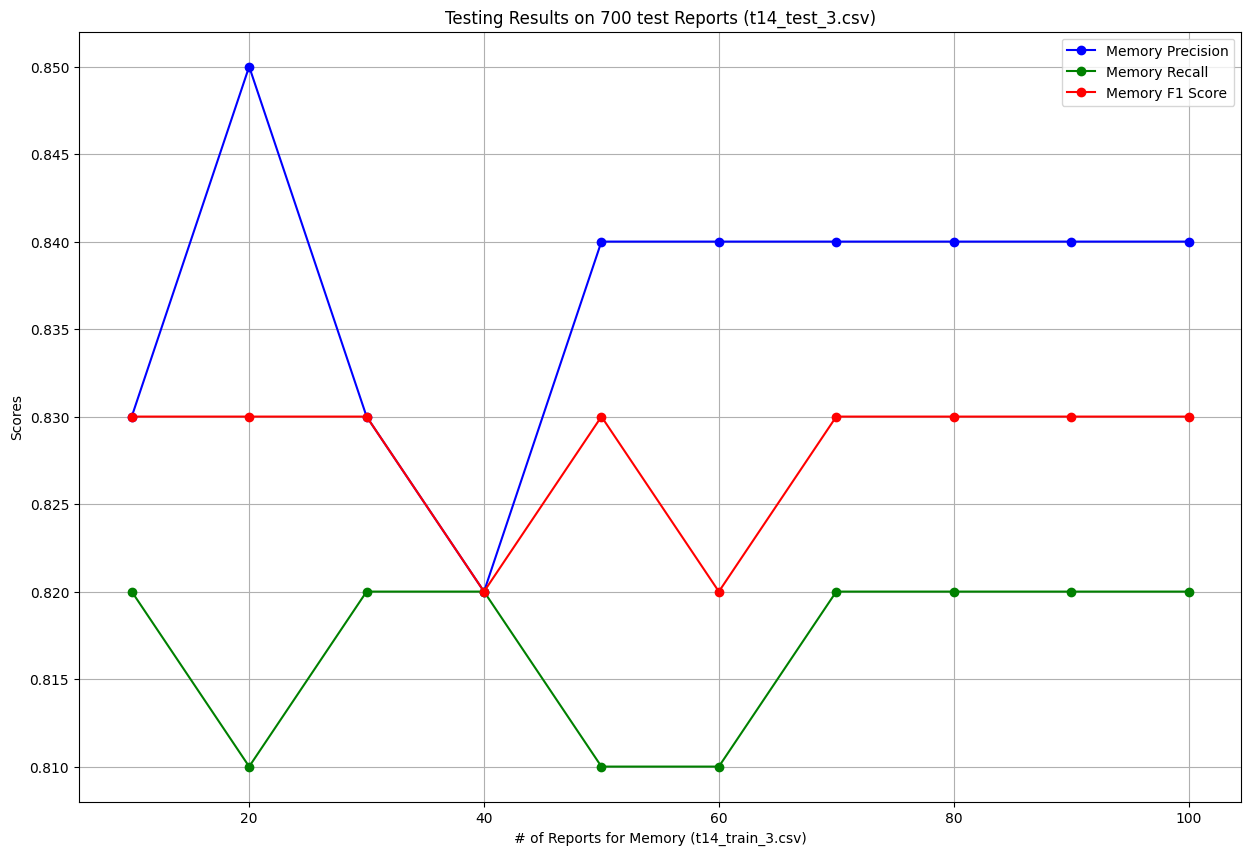

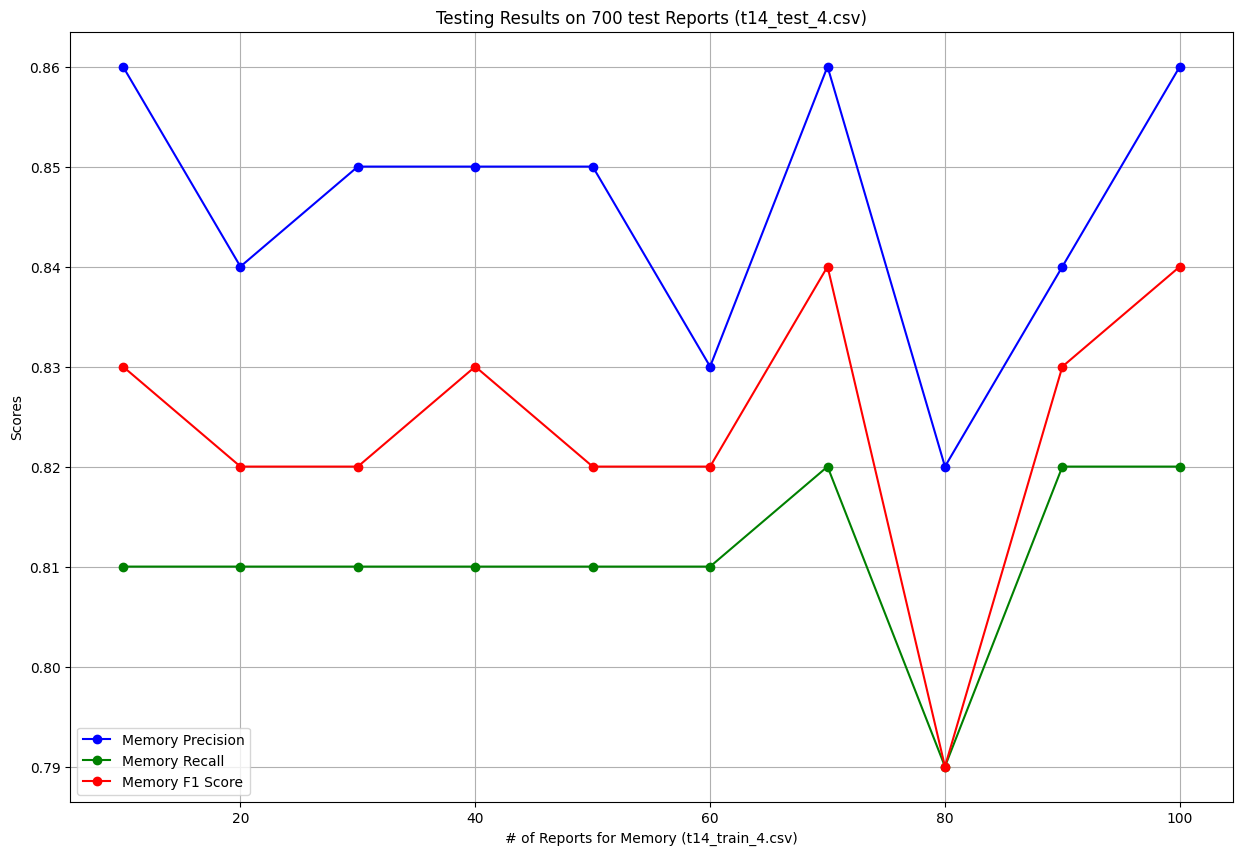

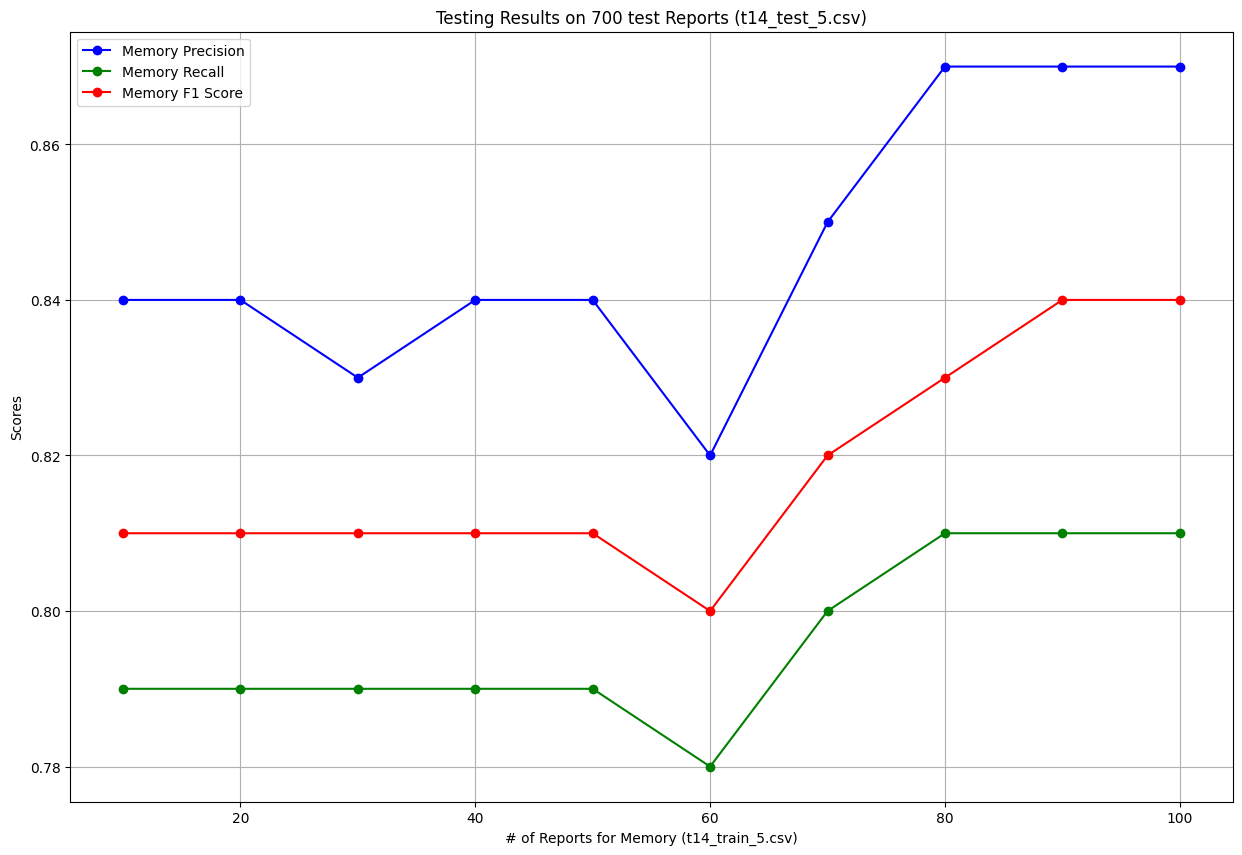

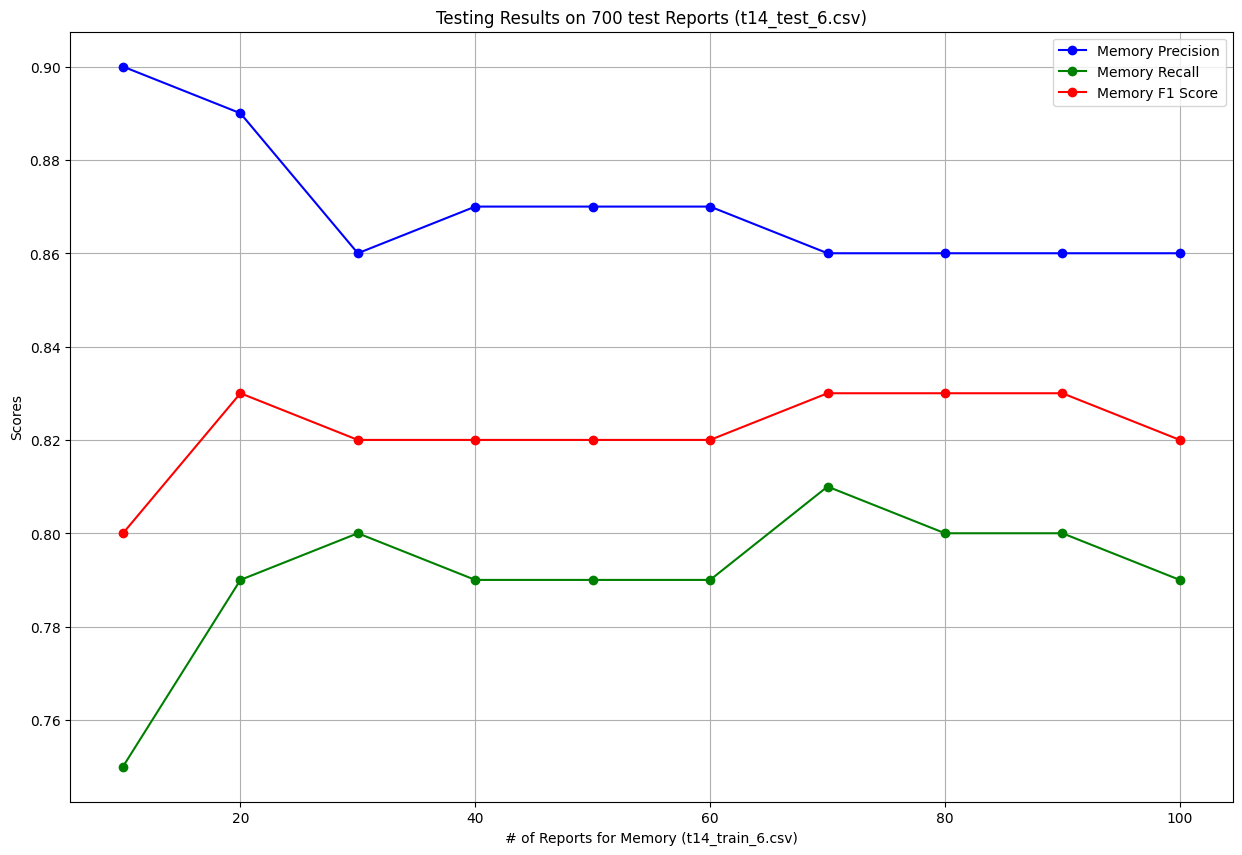

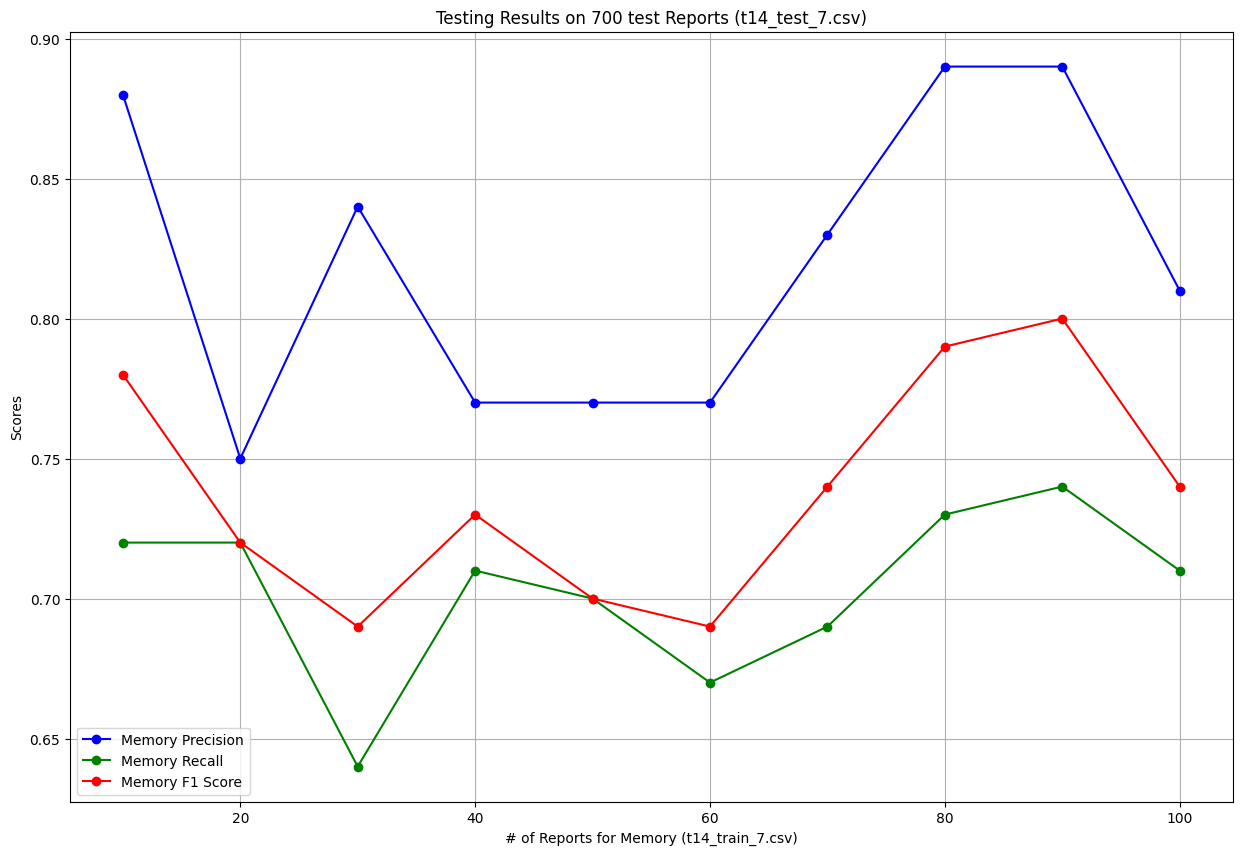

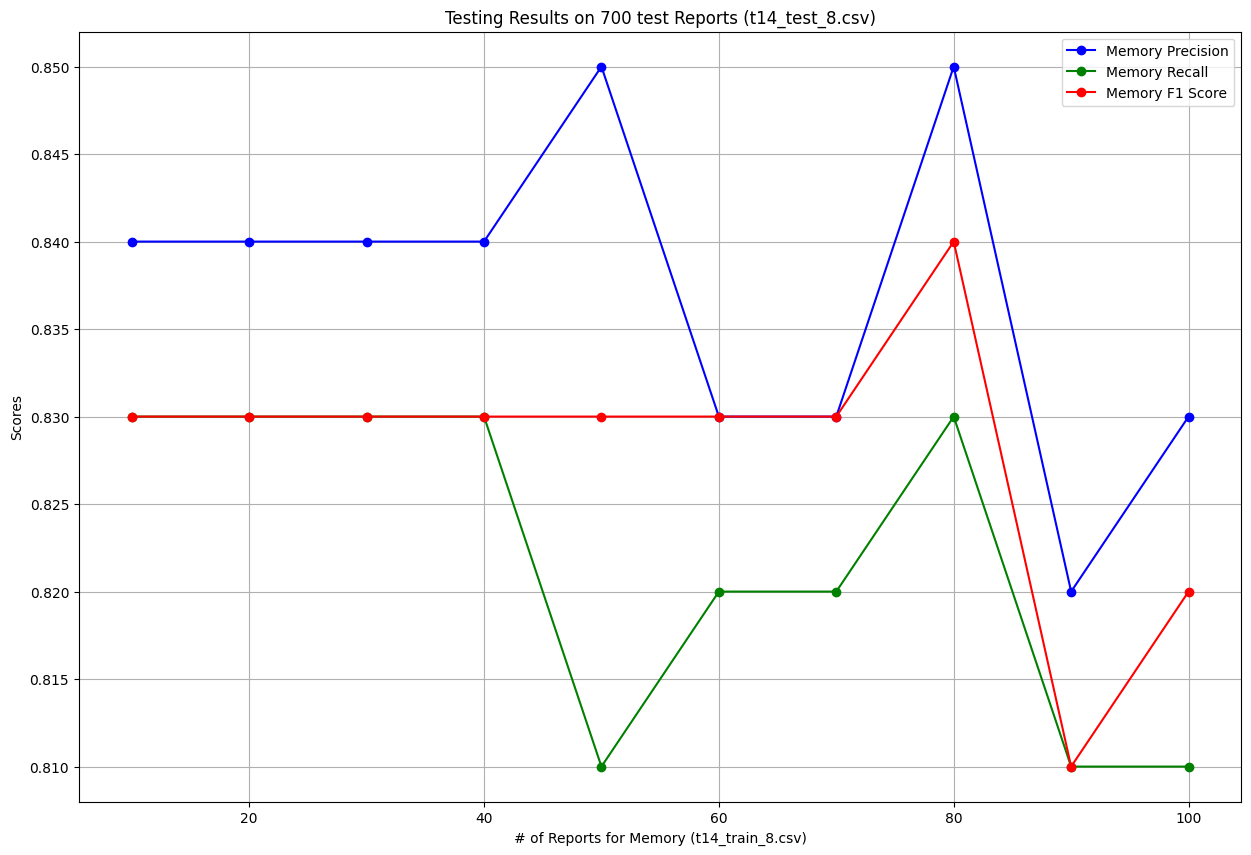

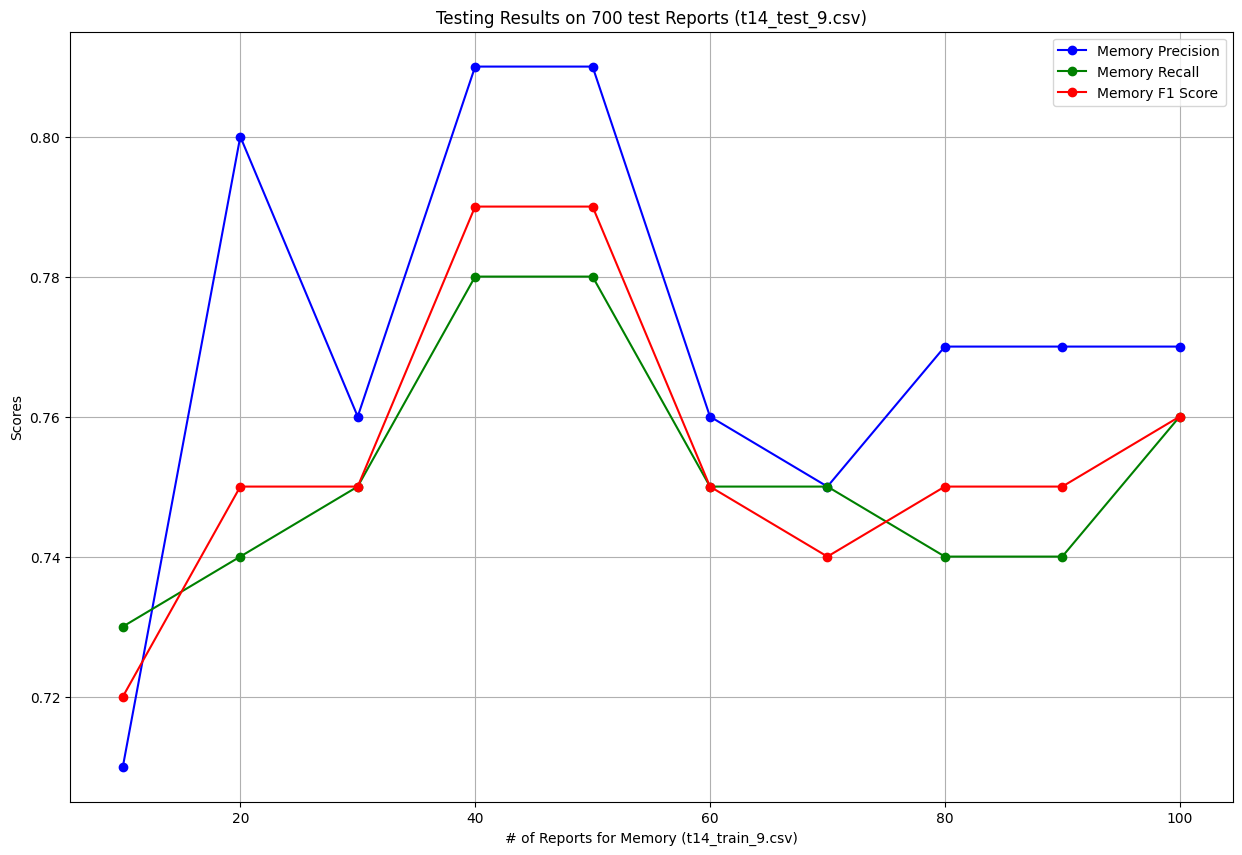

In [9]:
# individual graph

for run in range(10):
    # t14 training data to extract memory
    t_train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{run}.csv")

    memory_tup = []
    for idx, row in t_train_df.iterrows():
        # if row["cmem_t_is_updated"] == True:
        memory_tup.append((idx+1,row['cmem_t_memory_str']))
    memory_tup = memory_tup[9::10]
    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv")

    for i, _ in memory_tup:
        if len(test_df[test_df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
            print(f"parsing error at memory {i}")


   # gather y-axis data
    precision_lst = []
    recall_lst = []
    f1_lst = []

    x_idx = []
    for i, _ in memory_tup:
        x_idx.append(i)
        result = t14_calculate_metrics(test_df['t'], test_df[f'cmem_t_{i}reports_ans_str'])['overall']
        precision_lst.append(result['macro_precision'])
        recall_lst.append(result['macro_recall'])
        f1_lst.append(result['macro_f1'])


    plt.figure(figsize=(15, 10))

    plt.plot(x_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
    plt.plot(x_idx, recall_lst, label='Memory Recall', color='green', marker='o')
    plt.plot(x_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

    plt.xlabel(f'# of Reports for Memory (t14_train_{run}.csv)')
    plt.ylabel('Scores')
    plt.title(f'Testing Results on 700 test Reports (t14_test_{run}.csv)')
    plt.legend()
    plt.grid(True)

    plt.show()

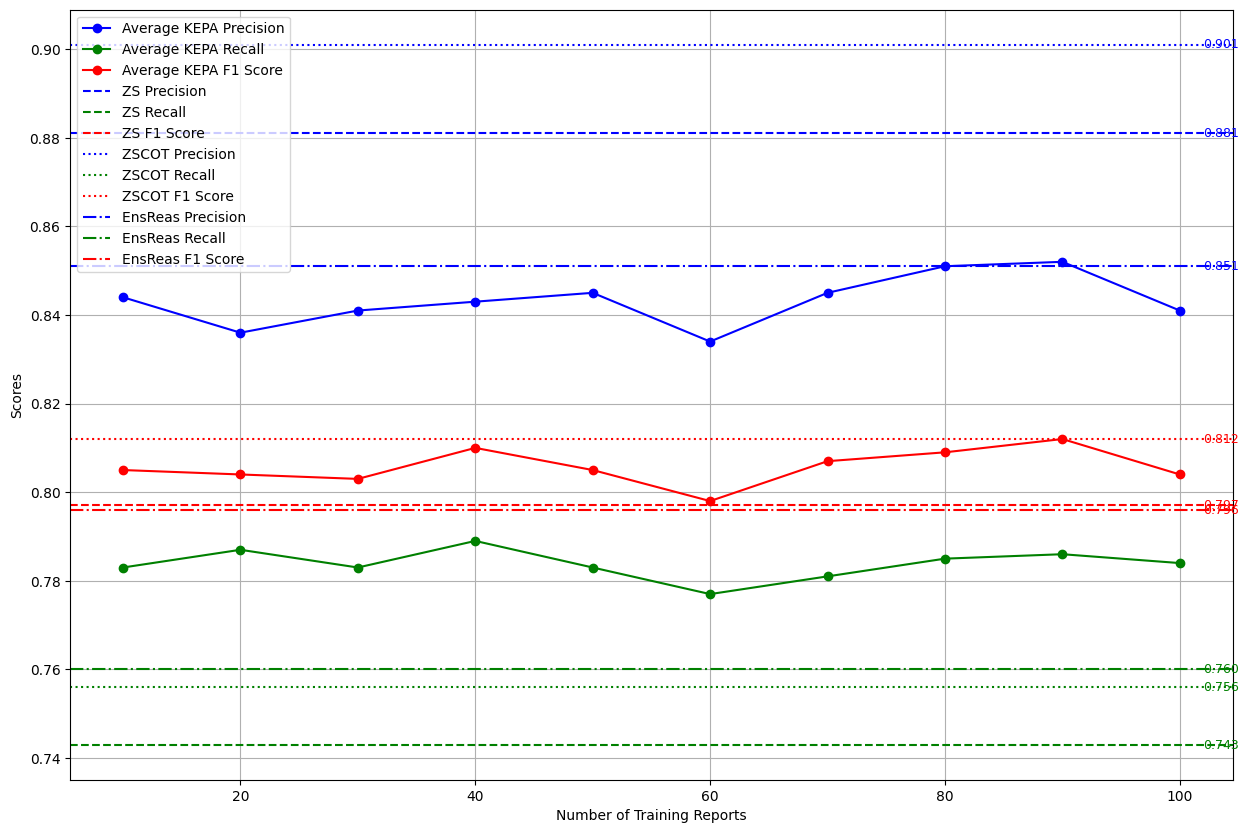

In [14]:
# Average (with new metric)

zs_t = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_real_zs_test_800.csv")
zscot_t = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/t14_zs_test_800.csv")
ensReas_t = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_ensReas_step1/brca_t14_merged_df_800.csv")

zs_t_results = []
zscot_t_results = []
ensReas_t_results = []

total_run = 10
for run in range(total_run):
    split_ids = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{run}.csv").patient_filename
    zs_t_split = zs_t[zs_t.patient_filename.isin(split_ids)]
    zs_t_results.append(t14_calculate_metrics(zs_t_split['t'], zs_t_split['zs_t_ans_str'])['overall'])

    zscot_t_split = zscot_t[zscot_t.patient_filename.isin(split_ids)]
    zscot_t_results.append(t14_calculate_metrics(zscot_t_split['t'], zscot_t_split['zs_t_ans_str'])['overall'])
    
    ensReas_t_split = ensReas_t[ensReas_t.patient_filename.isin(split_ids)]
    ensReas_t_results.append(t14_calculate_metrics(ensReas_t_split['t'], ensReas_t_split['sc_ans'])['overall'])
  
zs_precision_avg = sum([rs['macro_precision'] for rs in zs_t_results])/len(zs_t_results)
zs_recall_avg = sum([rs['macro_recall'] for rs in zs_t_results])/len(zs_t_results)
zs_f1_avg = sum([rs['macro_f1'] for rs in zs_t_results])/len(zs_t_results)

zscot_precision_avg = sum([rs['macro_precision'] for rs in zscot_t_results])/len(zscot_t_results)
zscot_recall_avg = sum([rs['macro_recall'] for rs in zscot_t_results])/len(zscot_t_results)
zscot_f1_avg = sum([rs['macro_f1'] for rs in zscot_t_results])/len(zscot_t_results)

ensReas_precision_avg = sum([rs['macro_precision'] for rs in ensReas_t_results])/len(ensReas_t_results)
ensReas_recall_avg = sum([rs['macro_recall'] for rs in ensReas_t_results])/len(ensReas_t_results)
ensReas_f1_avg = sum([rs['macro_f1'] for rs in ensReas_t_results])/len(ensReas_t_results)


x_axis = np.array(range(1, 11)) * 10

memory_precision_cumulative = []
memory_recall_cumulative = []
memory_f1_cumulative = []


for run in range(total_run):
    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv")

    for i in np.array(range(1, 11)): # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
        result = t14_calculate_metrics(test_df['t'], test_df[f'cmem_t_{i*10}reports_ans_str'])['overall']
        if run == 0:
            memory_precision_cumulative.append(result['macro_precision'])
            memory_recall_cumulative.append(result['macro_recall'])
            memory_f1_cumulative.append(result['macro_f1'])
        else:
            memory_precision_cumulative[i-1] += result['macro_precision']
            memory_recall_cumulative[i-1] += result['macro_recall']
            memory_f1_cumulative[i-1] += result['macro_f1']



# average
precision_avg = [p / total_run for p in memory_precision_cumulative]
recall_avg = [r / total_run for r in memory_recall_cumulative]
f1_avg = [f / total_run for f in memory_f1_cumulative]


plt.figure(figsize=(15, 10))

plt.plot(x_axis, precision_avg, label='Average KEPA Precision', color='blue', marker='o')
plt.plot(x_axis, recall_avg, label='Average KEPA Recall', color='green', marker='o')
plt.plot(x_axis, f1_avg, label='Average KEPA F1 Score', color='red', marker='o')


plt.axhline(y=zs_precision_avg, color='blue', linestyle='--', label='ZS Precision')
plt.axhline(y=zs_recall_avg, color='green', linestyle='--', label='ZS Recall')
plt.axhline(y=zs_f1_avg, color='red', linestyle='--', label='ZS F1 Score')

plt.axhline(y=zscot_precision_avg, color='blue', linestyle=':', label='ZSCOT Precision')
plt.axhline(y=zscot_recall_avg, color='green', linestyle=':', label='ZSCOT Recall')
plt.axhline(y=zscot_f1_avg, color='red', linestyle=':', label='ZSCOT F1 Score')

plt.axhline(y=ensReas_precision_avg, color='blue', linestyle='-.', label='EnsReas Precision')
plt.axhline(y=ensReas_recall_avg, color='green', linestyle='-.', label='EnsReas Recall')
plt.axhline(y=ensReas_f1_avg, color='red', linestyle='-.', label='EnsReas F1 Score')

plt.text(x_axis[-1] + 2, zs_precision_avg, f'{zs_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, zs_recall_avg, f'{zs_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, zs_f1_avg, f'{zs_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.text(x_axis[-1] + 2, zscot_precision_avg, f'{zscot_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, zscot_recall_avg, f'{zscot_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, zscot_f1_avg, f'{zscot_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.text(x_axis[-1] + 2, ensReas_precision_avg, f'{ensReas_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, ensReas_recall_avg, f'{ensReas_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, ensReas_f1_avg, f'{ensReas_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.xlabel('Number of Training Reports')
plt.ylabel('Scores')
# plt.title(f'The Average of 10 Results on 700 Test Reports (t14)')
plt.legend()
plt.grid(True)

plt.show()


### N03

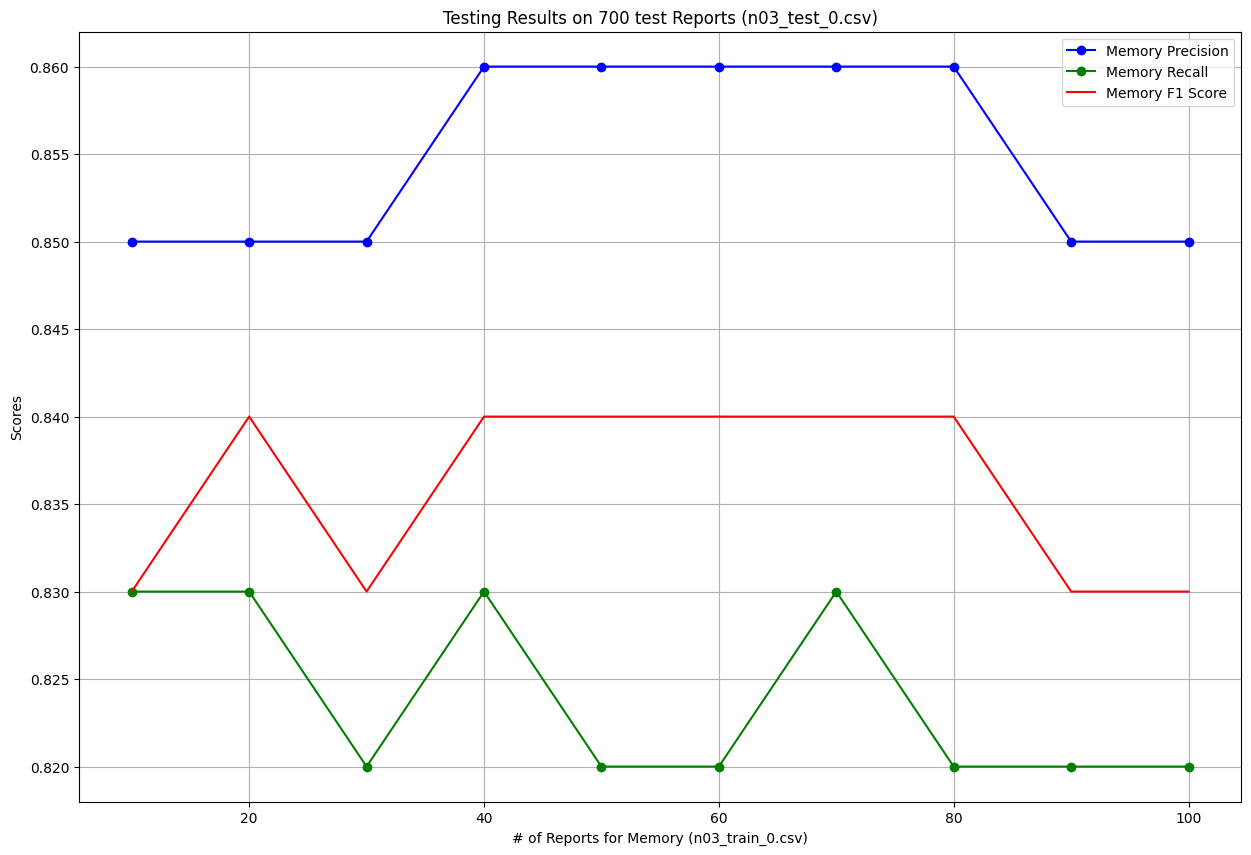

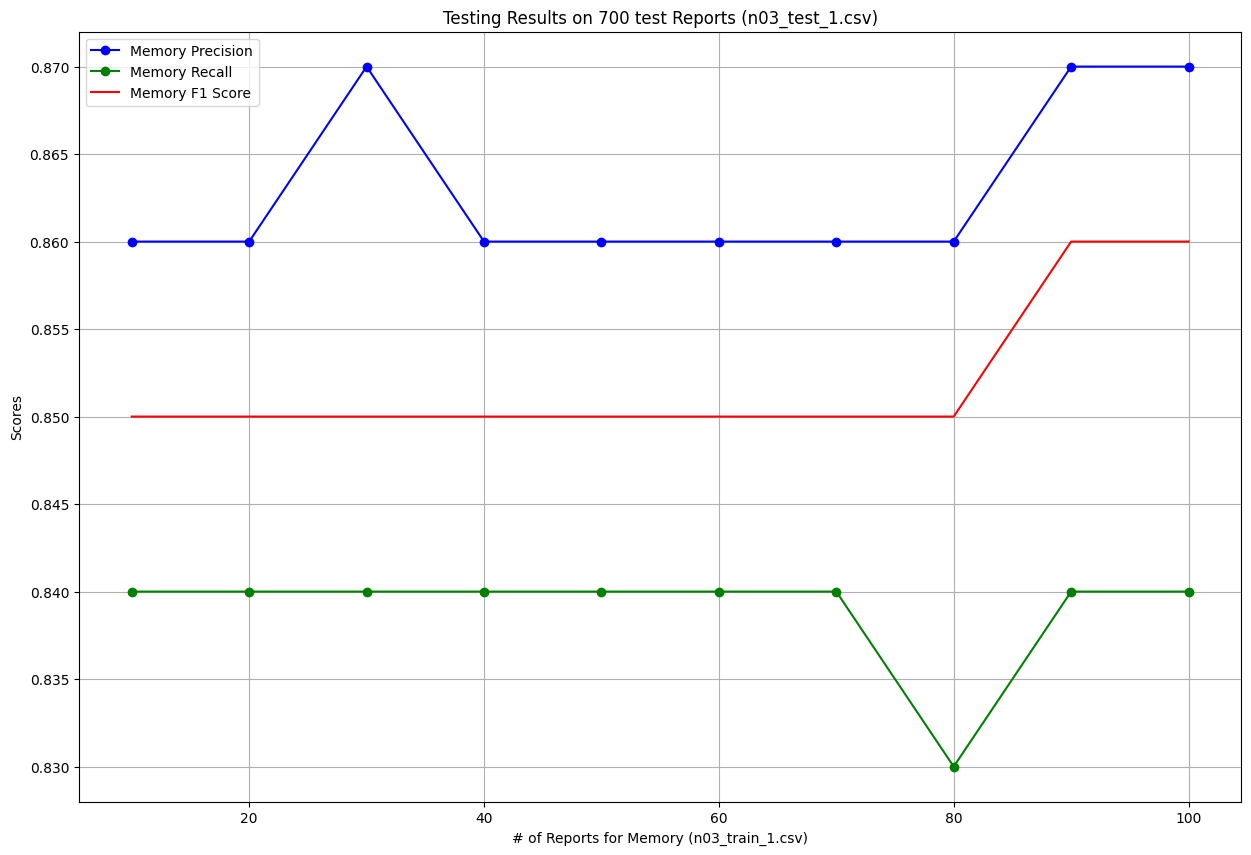

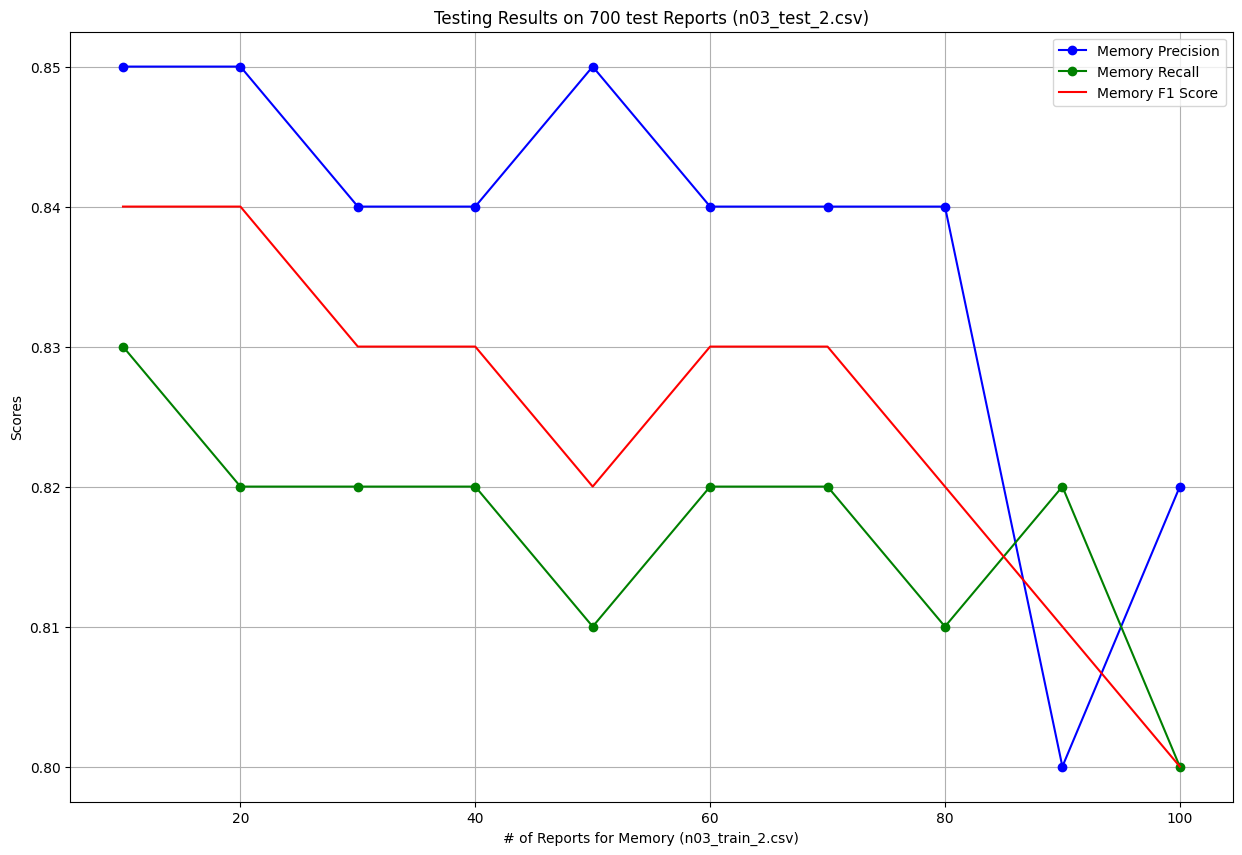

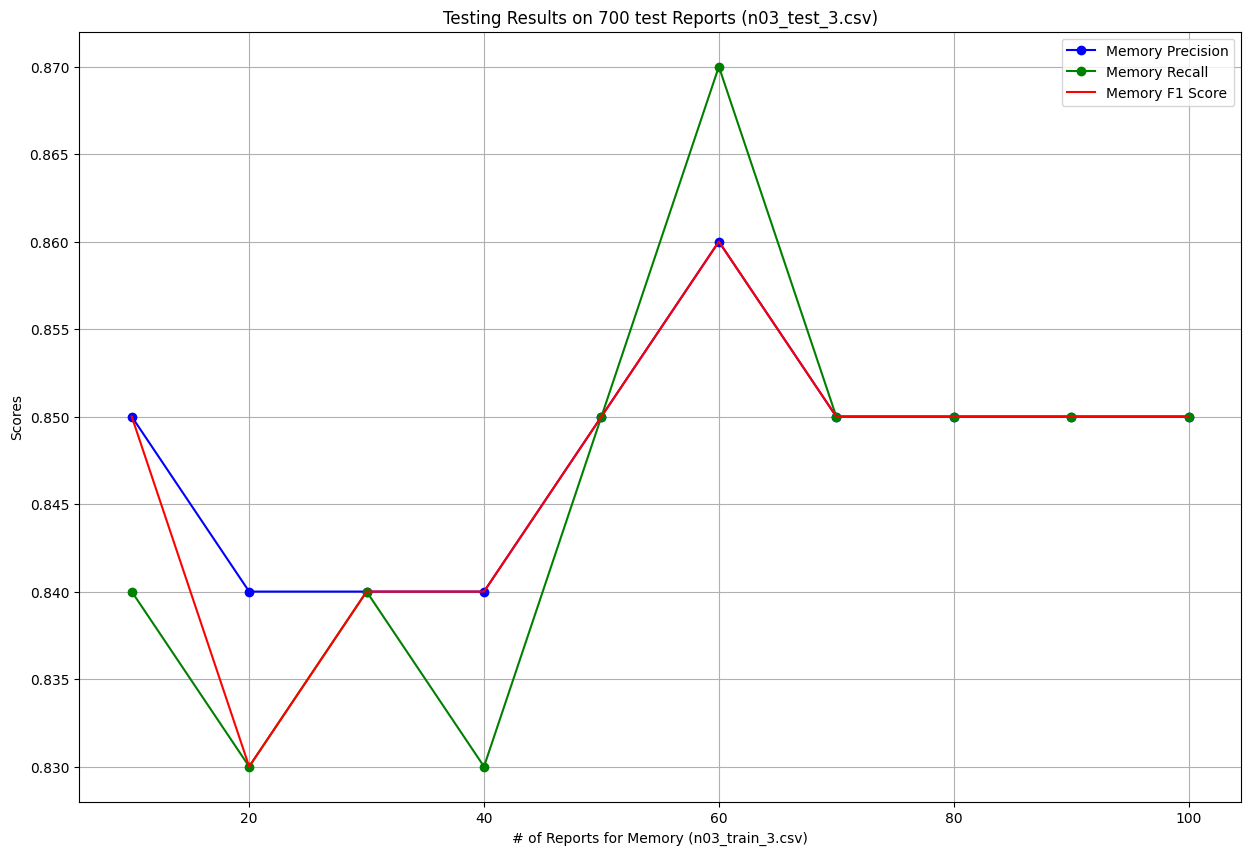

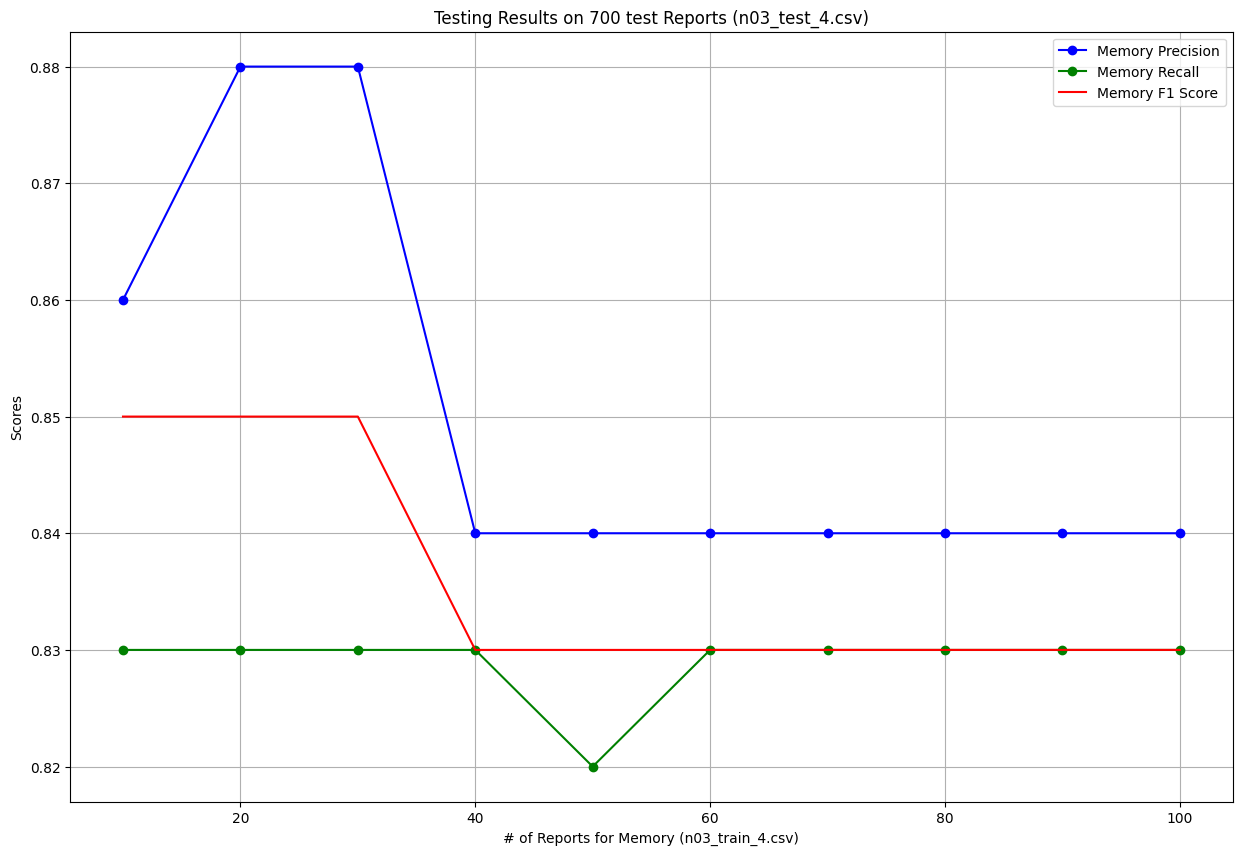

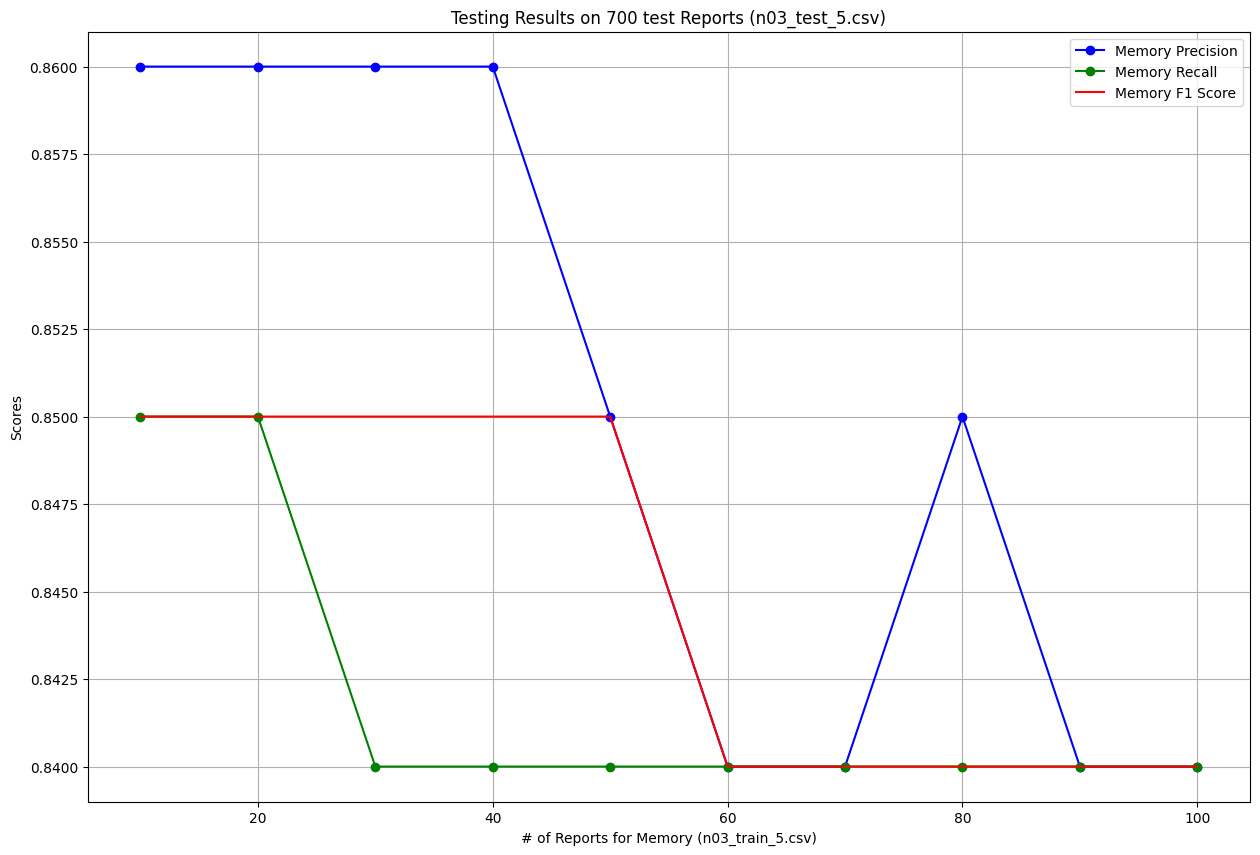

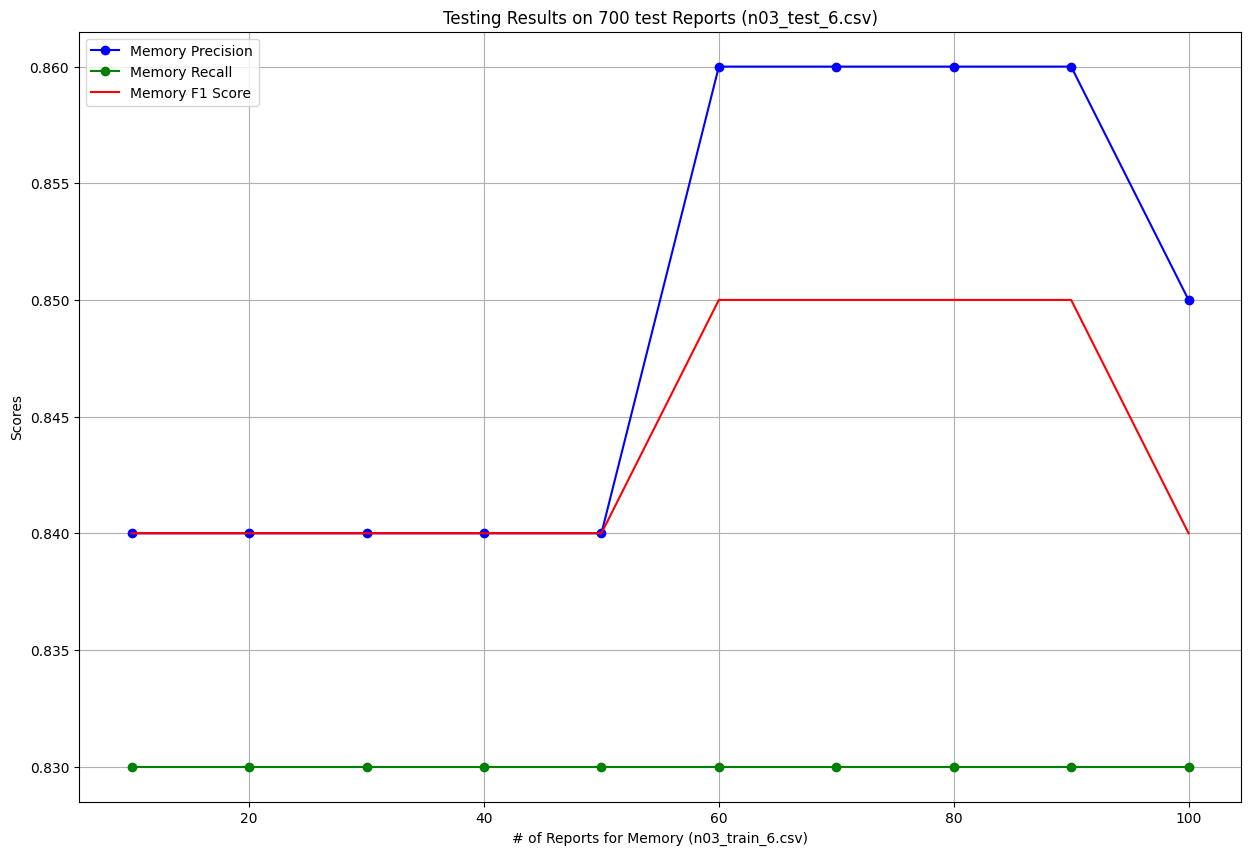

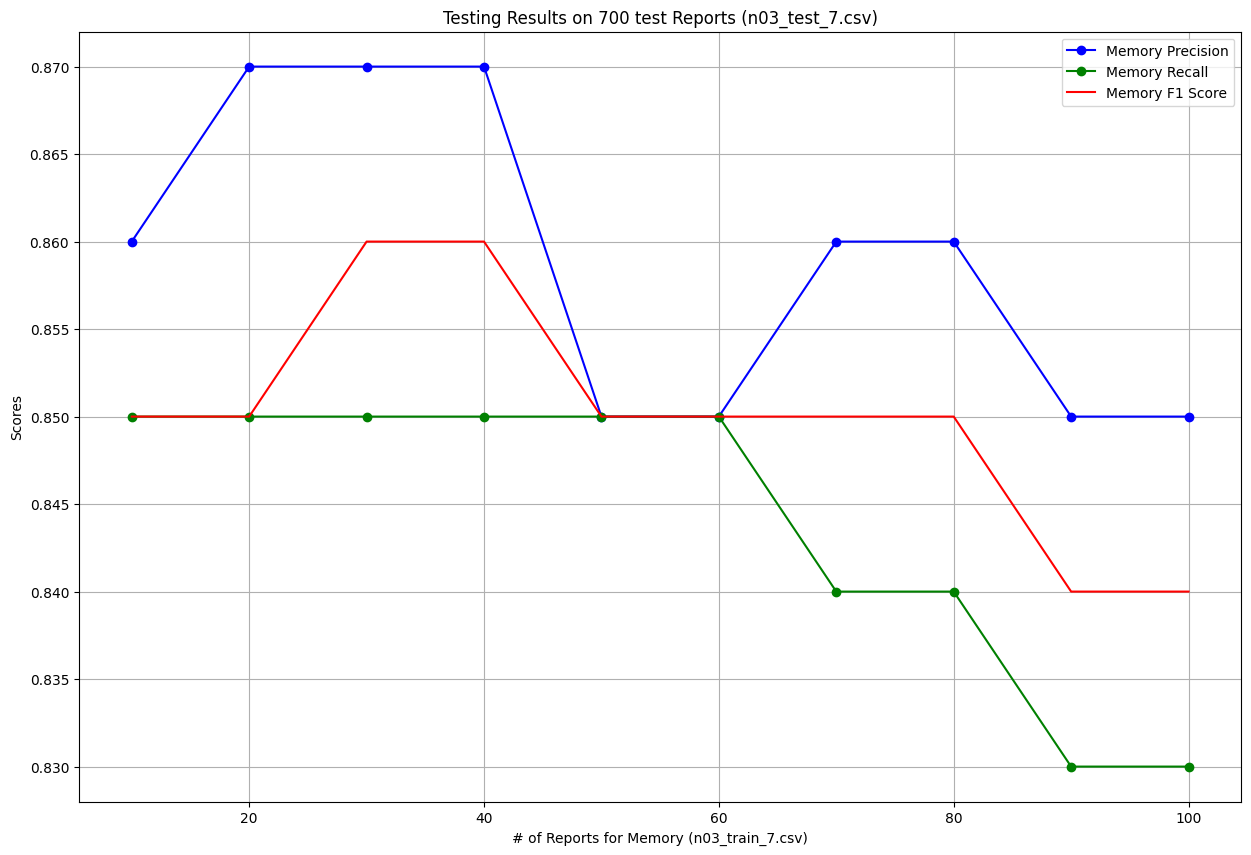

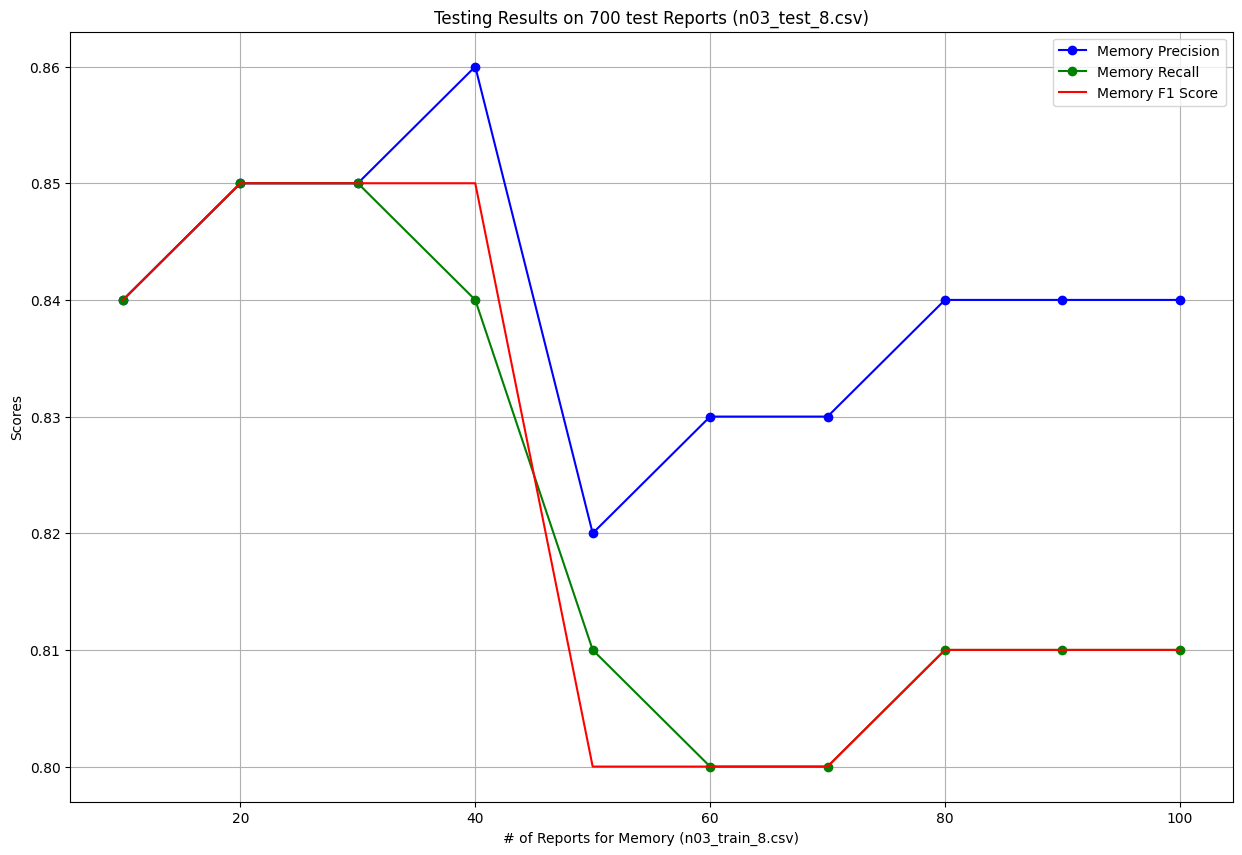

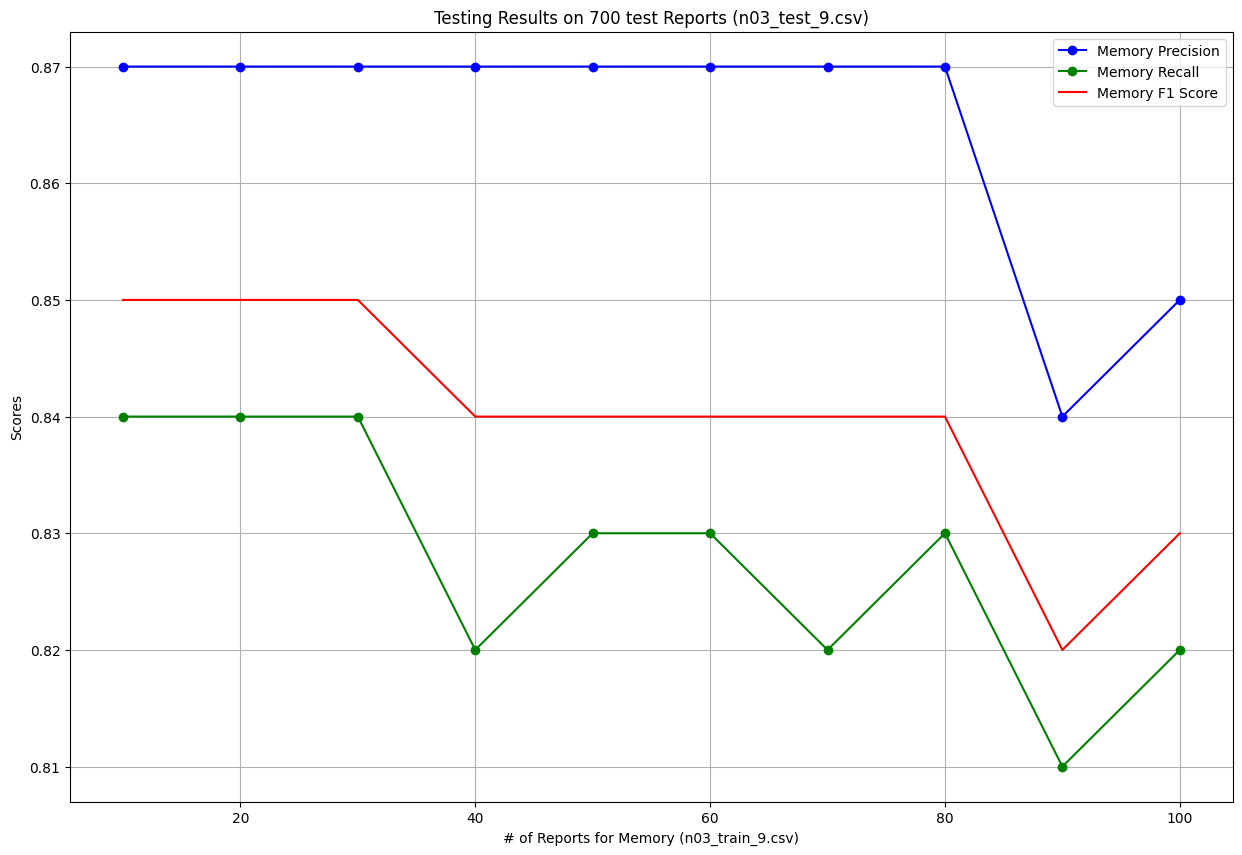

In [15]:
# individual graph

for run in range(10):
    # n03 training data to extract memory
    t_train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_memory_dataset{run}.csv")

    memory_tup = []
    for idx, row in t_train_df.iterrows():
        # if row["cmem_t_is_updated"] == True:
        memory_tup.append((idx+1,row['cmem_n_memory_str']))
    memory_tup = memory_tup[9::10]
    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_{run}_outof_10runs.csv")

    for i, _ in memory_tup:
        if len(test_df[test_df[f"cmem_n_{i}reports_is_parsed"]==False]) > 0:
            print(f"parsing error at memory {i}")


   # gather y-axis data
    precision_lst = []
    recall_lst = []
    f1_lst = []

    x_idx = []
    for i, _ in memory_tup:
        x_idx.append(i)
        result = n03_calculate_metrics(test_df['n'], test_df[f'cmem_n_{i}reports_ans_str'])['overall']
        precision_lst.append(result['macro_precision'])
        recall_lst.append(result['macro_recall'])
        f1_lst.append(result['macro_f1'])


    plt.figure(figsize=(15, 10))

    plt.plot(x_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
    plt.plot(x_idx, recall_lst, label='Memory Recall', color='green', marker='o')
    plt.plot(x_idx, f1_lst, label='Memory F1 Score', color='red')

    plt.xlabel(f'# of Reports for Memory (n03_train_{run}.csv)')
    plt.ylabel('Scores')
    plt.title(f'Testing Results on 700 test Reports (n03_test_{run}.csv)')
    plt.legend()
    plt.grid(True)

    plt.show()

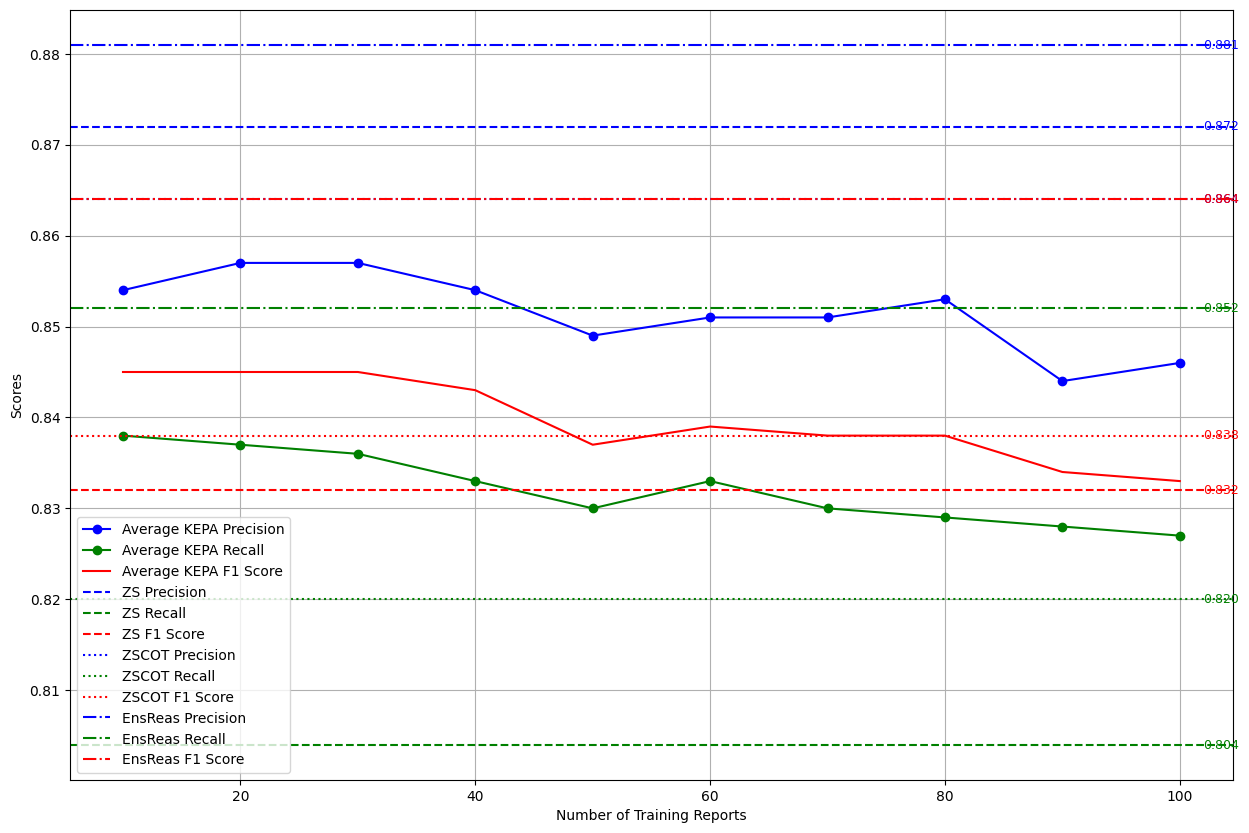

In [16]:
# Average (with new metric)

zs_n = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_real_zs_test_800.csv")
zscot_n = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/0716/n03_zs_test_800.csv")
ensReas_n = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_ensReas_step1/brca_n03_merged_df.csv")

zs_n_results = []
zscot_n_results = []
ensReas_n_results = []

total_run = 10
for run in range(total_run):
    split_ids = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{run}.csv").patient_filename
    zs_n_split = zs_n[zs_n.patient_filename.isin(split_ids)]
    zs_n_results.append(n03_calculate_metrics(zs_n_split['n'], zs_n_split['zs_n_ans_str'])['overall'])

    zscot_n_split = zscot_n[zscot_n.patient_filename.isin(split_ids)]
    zscot_n_results.append(n03_calculate_metrics(zscot_n_split['n'], zscot_n_split['zs_n_ans_str'])['overall'])

    ensReas_n_split = ensReas_n[ensReas_n.patient_filename.isin(split_ids)]
    ensReas_n_results.append(n03_calculate_metrics(ensReas_n_split['n'], ensReas_n_split['sc_ans'])['overall'])

zs_precision_avg = sum([rs['macro_precision'] for rs in zs_n_results])/len(zs_n_results)
zs_recall_avg = sum([rs['macro_recall'] for rs in zs_n_results])/len(zs_n_results)
zs_f1_avg = sum([rs['macro_f1'] for rs in zs_n_results])/len(zs_n_results)

zscot_precision_avg = sum([rs['macro_precision'] for rs in zscot_n_results])/len(zscot_n_results)
zscot_recall_avg = sum([rs['macro_recall'] for rs in zscot_n_results])/len(zscot_n_results)
zscot_f1_avg = sum([rs['macro_f1'] for rs in zscot_n_results])/len(zscot_n_results)

ensReas_precision_avg = sum([rs['macro_precision'] for rs in ensReas_n_results])/len(ensReas_n_results)
ensReas_recall_avg = sum([rs['macro_recall'] for rs in ensReas_n_results])/len(ensReas_n_results)
ensReas_f1_avg = sum([rs['macro_f1'] for rs in ensReas_n_results])/len(ensReas_n_results)


x_axis = np.array(range(1, 11)) * 10

memory_precision_cumulative = []
memory_recall_cumulative = []
memory_f1_cumulative = []

for run in range(total_run):
    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_{run}_outof_10runs.csv")

    for i in np.array(range(1, 11)): # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
        result = n03_calculate_metrics(test_df['n'], test_df[f'cmem_n_{i*10}reports_ans_str'])['overall']
        if run == 0:
            memory_precision_cumulative.append(result['macro_precision'])
            memory_recall_cumulative.append(result['macro_recall'])
            memory_f1_cumulative.append(result['macro_f1'])
        else:
            memory_precision_cumulative[i-1] += result['macro_precision']
            memory_recall_cumulative[i-1] += result['macro_recall']
            memory_f1_cumulative[i-1] += result['macro_f1']


# average
precision_avg = [p / total_run for p in memory_precision_cumulative]
recall_avg = [r / total_run for r in memory_recall_cumulative]
f1_avg = [f / total_run for f in memory_f1_cumulative]


plt.figure(figsize=(15, 10))

plt.plot(x_axis, precision_avg, label='Average KEPA Precision', color='blue', marker='o')
plt.plot(x_axis, recall_avg, label='Average KEPA Recall', color='green', marker='o')
plt.plot(x_axis, f1_avg, label='Average KEPA F1 Score', color='red')


plt.axhline(y=zs_precision_avg, color='blue', linestyle='--', label='ZS Precision')
plt.axhline(y=zs_recall_avg, color='green', linestyle='--', label='ZS Recall')
plt.axhline(y=zs_f1_avg, color='red', linestyle='--', label='ZS F1 Score')

plt.axhline(y=zscot_precision_avg, color='blue', linestyle=':', label='ZSCOT Precision')
plt.axhline(y=zscot_recall_avg, color='green', linestyle=':', label='ZSCOT Recall')
plt.axhline(y=zscot_f1_avg, color='red', linestyle=':', label='ZSCOT F1 Score')

plt.axhline(y=ensReas_precision_avg, color='blue', linestyle='-.', label='EnsReas Precision')
plt.axhline(y=ensReas_recall_avg, color='green', linestyle='-.', label='EnsReas Recall')
plt.axhline(y=ensReas_f1_avg, color='red', linestyle='-.', label='EnsReas F1 Score')

plt.text(x_axis[-1] + 2, zs_precision_avg, f'{zs_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, zs_recall_avg, f'{zs_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, zs_f1_avg, f'{zs_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.text(x_axis[-1] + 2, zscot_precision_avg, f'{zscot_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, zscot_recall_avg, f'{zscot_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, zscot_f1_avg, f'{zscot_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.text(x_axis[-1] + 2, ensReas_precision_avg, f'{ensReas_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
plt.text(x_axis[-1] + 2, ensReas_recall_avg, f'{ensReas_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
plt.text(x_axis[-1] + 2, ensReas_f1_avg, f'{ensReas_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.xlabel('Number of Training Reports')
plt.ylabel('Scores')
# plt.title(f'The Average of 10 Results on 700 Test Reports (n03)')
plt.legend()
plt.grid(True)

plt.show()

# Re-run for Error cases

In [6]:
client = OpenAI(api_key = "empty",
                base_url = "http://localhost:8000/v1")
    
class TestingResponse(BaseModel):
    predictedStage: str = Field(description="predicted cancer stage")
    reasoning: str = Field(description="reasoning to support predicted cancer stage") 

testing_schema = TestingResponse.model_json_schema()

def test_individual_report(dataset: pd.DataFrame, patient_filename: str, memory_tup: tuple, category = 'n'):
    num, memory = memory_tup
    report = dataset[dataset.patient_filename == patient_filename]["text"].values[0]

    if category.lower()[0] == 'n':
        prompt = testing_predict_prompt_n03.format(memory=memory, report=report)
    else:
        prompt = testing_predict_prompt_t14.format(memory=memory, report=report)
    
    prompt = system_instruction + "\n" + prompt
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model = "mistralai/Mixtral-8x7B-Instruct-v0.1",
        messages = messages,
        extra_body = {"guided_json": testing_schema},
        temperature = 0.1)
    # response = json.loads(response.choices[0].message.content.replace("\\", "\\\\"))
    response = json.loads(response.choices[0].message.content)

    dataset.loc[dataset["patient_filename"] == patient_filename, f"cmem_{category}_{num}reports_is_parsed"] = True
    dataset.loc[dataset["patient_filename"] == patient_filename, f"cmem_{category}_{num}reports_ans_str"] = response["predictedStage"]
    dataset.loc[dataset["patient_filename"] == patient_filename, f"cmem_{category}_{num}reports_reasoning"] = response["reasoning"]

    return dataset

In [2]:
# T14
for run in range(10):
    print(f"{run}th split")

    t_train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{run}.csv")
    memory_tup = []
    for idx, row in t_train_df.iterrows():
        memory_tup.append((idx+1,row['cmem_t_memory_str']))
    memory_tup = memory_tup[9::10]

    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv")
    for num, memory in memory_tup:
        print(f"{num}th memory")
        for idx in range(len(test_df)):     
            patient_filename = test_df.loc[idx, "patient_filename"]
            if not isinstance(test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_t_{num}reports_ans_str"].values.item(), str):
                print(idx) 
                print("before: ", test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_t_{num}reports_ans_str"].values.item())
                test_individual_report(test_df, patient_filename, (num, memory), 't')
                print("after: ", test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_t_{num}reports_ans_str"].values.item())
                print("label: ", test_df.loc[test_df["patient_filename"] == patient_filename, "t"].values.item())
    
    test_df.to_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv", index=False)

0th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
1th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
2th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
3th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
4th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
5th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
6th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
7th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
7

In [8]:
# N03
for run in range(10):
    print(f"{run}th split")

    t_train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_memory_dataset{run}.csv")
    memory_tup = []
    for idx, row in t_train_df.iterrows():
        memory_tup.append((idx+1,row['cmem_n_memory_str']))
    memory_tup = memory_tup[9::10]

    test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_{run}_outof_10runs.csv")
    for num, memory in memory_tup:
        print(f"{num}th memory")
        for idx in range(len(test_df)):     
            patient_filename = test_df.loc[idx, "patient_filename"]
            if not isinstance(test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_n_{num}reports_ans_str"].values.item(), str):
                print(idx) 
                print("before: ", test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_n_{num}reports_ans_str"].values.item())
                test_individual_report(test_df, patient_filename, (num, memory), 'n')
                print("after: ", test_df.loc[test_df["patient_filename"] == patient_filename, f"cmem_n_{num}reports_ans_str"].values.item())
                print("label: ", test_df.loc[test_df["patient_filename"] == patient_filename, "n"].values.item())
    
    test_df.to_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_n03_dynamic_test_{run}_outof_10runs.csv", index=False)

0th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
1th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
2th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
3th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
4th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
5th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
6th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
70th memory
80th memory
90th memory
100th memory
7th split
10th memory
20th memory
30th memory
40th memory
50th memory
60th memory
7

In [ ]:
memory_tup

# Check the Difference in Performance Based on the Order of Fields in the Schema

In [ ]:
run = 4
test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs.csv")
for i in np.array(range(1, 11)): # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
    result = t14_calculate_metrics(test_df['t'], test_df[f'cmem_t_{i*10}reports_ans_str'])['overall']
    print(result)

In [ ]:
run = 4
test_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/0718_t14_dynamic_test_{run}_outof_10runs_revised.csv")
for i in np.array(range(1, 11)): # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
    if len(test_df[test_df[f"cmem_t_{i*10}reports_is_parsed"]==False]) > 0:
        print(len(test_df[test_df[f"cmem_t_{i*10}reports_is_parsed"]==False]))
    print(t14_calculate_metrics(test_df['t'], test_df[f'cmem_t_{i*10}reports_ans_str'])['overall'])

# Plot Memory length

In [ ]:
# individual memory string length for T14

for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{i}.csv")
    x_indices = []
    y_str_length_mem = []
    y_str_length_rules = []
 
    for idx, row in train_df.iterrows():
        x_indices.append(idx+1)
        y_str_length_mem.append(len(row['cmem_t_memory_str']))
        y_str_length_rules.append(len(row['cmem_t_rules_str']))
    
    plt.figure(figsize=(15, 10))

    plt.plot(x_indices, y_str_length_mem, label='Memory String Length', color='blue', marker='o')
    plt.plot(x_indices, y_str_length_rules, label='Rules String Length', color='red', marker='o')

    plt.xlabel(f'Index of Memory Dataset (t14_memory_dataset{i}.csv)')
    plt.ylabel('Length')
    # plt.title(f'Length of Memory and Rules')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
# average memory string length for T14
y_str_length_mem_arr = np.array([0]*100)
y_str_length_rules_arr = np.array([0]*100)
x_indices = np.array(range(1, 101))

for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{i}.csv")

    for idx, row in train_df.iterrows():
        y_str_length_mem_arr[idx] += len(row['cmem_t_memory_str'])
        y_str_length_rules_arr[idx] += len(row['cmem_t_rules_str']) 

plt.figure(figsize=(15, 10))

plt.plot(x_indices, y_str_length_mem_arr/10, label='Threshold 80', color='blue', marker='o')
plt.plot(x_indices, y_str_length_rules_arr/10, label='Threshold 0', color='red', marker='o')

plt.xlabel(f'Number of Training Reports (T14)')
plt.ylabel('Average Length of Memory')
# plt.title(f'Length of Memory and Rules')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# individual number of rules in memory for T14
for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{i}.csv")
    x_indices = []

    y_num_rules_mem = []
    y_num_rules_rules = []
    for idx, row in train_df.iterrows():
        x_indices.append(idx+1)
        y_num_rules_mem.append(len(row['cmem_t_memory_str'].split("\n")))
        y_num_rules_rules.append(len(row['cmem_t_rules_str'].split("\n")))
    
    plt.figure(figsize=(15, 10))

    plt.plot(x_indices, y_num_rules_mem, label='Memory Num Rules', color='blue', marker='o')
    plt.plot(x_indices, y_num_rules_rules, label='Rules Num Rules', color='red', marker='o')

    plt.xlabel(f'Index of Memory Dataset (t14_memory_dataset{i}.csv)')
    plt.ylabel('Number')
    plt.title(f'Number of Rules')
    plt.legend()
    plt.grid(True)

    max_y = max(max(y_num_rules_mem), max(y_num_rules_rules))
    plt.yticks(range(0, int(max_y) + 1))

    plt.show()

In [ ]:
# average number of rules in memory for T14
y_num_rules_mem_arr = np.array([0]*100)
y_num_rules_rules_arr = np.array([0]*100)
x_indices = np.array(range(1, 101))

for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_memory_dataset{i}.csv")

    for idx, row in train_df.iterrows():
        y_num_rules_mem_arr[idx] += len(row['cmem_t_memory_str'].split("\n"))
        y_num_rules_rules_arr[idx] += len(row['cmem_t_rules_str'].split("\n"))

plt.figure(figsize=(15, 10))

plt.plot(x_indices, y_num_rules_mem_arr/10, label='Threshold 80', color='blue', marker='o')
plt.plot(x_indices, y_num_rules_rules_arr/10, label='Threshold 0', color='red', marker='o')

plt.xlabel(f'Number of Training Reports')
plt.ylabel('Average Number of Rules')

plt.legend()
plt.grid(True)

plt.show()

### n

In [ ]:
# individual memory string length for N03
for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_memory_dataset{i}.csv")
    x_indices = []
    y_str_length_mem = []
    y_str_length_rules = []
 
    for idx, row in train_df.iterrows():
        x_indices.append(idx+1)
        y_str_length_mem.append(len(row['cmem_n_memory_str']))
        y_str_length_rules.append(len(row['cmem_n_rules_str']))
    
    plt.figure(figsize=(15, 10))

    plt.plot(x_indices, y_str_length_mem, label='Memory String Length', color='blue', marker='o')
    plt.plot(x_indices, y_str_length_rules, label='Rules String Length', color='red', marker='o')

    plt.xlabel(f'Index of Memory Dataset (n03_memory_dataset{i}.csv)')
    plt.ylabel('Length')
    # plt.title(f'Length of Memory and Rules')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
# average memory string length for N03
y_str_length_mem_arr = np.array([0]*100)
y_str_length_rules_arr = np.array([0]*100)
x_indices = np.array(range(1, 101))

for i in range(10):
    train_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_memory_dataset{i}.csv")

    for idx, row in train_df.iterrows():
        y_str_length_mem_arr[idx] += len(row['cmem_n_memory_str'])
        y_str_length_rules_arr[idx] += len(row['cmem_n_rules_str']) 

plt.figure(figsize=(15, 10))

plt.plot(x_indices, y_str_length_mem_arr/10, label='Threshold 80', color='blue', marker='o')
plt.plot(x_indices, y_str_length_rules_arr/10, label='Threshold 0', color='red', marker='o')

plt.xlabel(f'Number of Training Reports (N03)')
plt.ylabel('Average Length of Memory')
# plt.title(f'Length of Memory and Rules')
plt.legend()
plt.grid(True)

plt.show()


# Create format instruction

In [ ]:
class TrainingResponse(BaseModel):
    reasoning: str = Field(description="reasoning to support predicted cancer stage")
    predictedStage: str = Field(description="predicted cancer stage")
    rules: List[str] = Field(description="list of rules") 

class TestingResponse(BaseModel):
    reasoning: str = Field(description="reasoning to support predicted cancer stage") 
    predictedStage: str = Field(description="predicted cancer stage")
     

In [ ]:
parser = PydanticOutputParser(pydantic_object=TestingResponse)
format_instruction=parser.get_format_instructions()
print(type(format_instruction))
print(format_instruction)

In [ ]:
res=TestingResponse.model_validate_json('{\n  "predictedStage": "T2",\n  "reasoning": "The largest dimension of the tumor is 3.7 cm, which falls within the range for T2 (greater than 2 cm but not greater than 5 cm)."\n}')

In [ ]:
res.reasoning